#**DATA COLLECTION**

**SCRAPPING STATISTIK PERKEBUNAN JILID I 2022-2024.pdf**

In [239]:
!pip install PyMuPDF pytesseract Pillow
!pip install camelot-py[cv] tabula-py pdfplumber PyPDF2

In [240]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [241]:
pdf_filename1= '/content/drive/MyDrive/DATWRANG/STATISTIK PERKEBUNAN JILID I 2022-2024.pdf'

In [242]:
import fitz
doc = fitz.open(pdf_filename1)
doc

Document('/content/drive/MyDrive/DATWRANG/STATISTIK PERKEBUNAN JILID I 2022-2024.pdf')

In [243]:
doc.metadata

{'format': 'PDF 1.6',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': 'Adobe Acrobat Pro 10.1.16',
 'producer': 'Adobe Acrobat Pro 10.1.16',
 'creationDate': "D:20240325151001+07'00'",
 'modDate': "D:20240325151001+07'00'",
 'trapped': '',
 'encryption': None}

In [244]:
#table of content
doc.get_toc()

[[1, '00 COVER DEPAN STATISTIK UNGGULAN 2022-2024', 1],
 [1, '0 kata pengantar statistik perkebunan 2022-2024', 2],
 [1, 'BAB 1 TABEL ATAP_ KELAPA SAWIT 2022-2024', 54],
 [1, 'BAB 2  KARET 2022-2024', 140],
 [1, 'BAB 3 TABEL ATAP_ KELAPA 2022-2024', 214],
 [1, 'BAB 4 TABEL KOPI 2022-2024', 356],
 [1, 'BAB 5 KAKAO 2022-2024', 452],
 [1, 'BAB 6 TABEL ATAP_METE 2022-2024', 532],
 [1, 'BAB 7 TABEL ATAP_CENGKEH 2022-2024', 586],
 [1, 'BAB 8 LADA 2022-2024', 654],
 [1, 'BAB 9 TABEL TEH 2022- 2024', 710],
 [1, 'BAB 10 TABEL ATAP_PALA 2022-2024', 766],
 [1, 'BAB 11 TABEL ATAP_SAGU 2022-2024', 830],
 [1, 'BAB 12 TABEL ATAP_TEBU 2021-2024', 876],
 [1, 'BAB 13 TABEL ATAP_TEMBAKAU 2022-2024', 934],
 [1, 'BAB 14 TABEL ATAP_NILAM 2022-2024', 992],
 [1, 'BAB 15 TABEL ATAP_KAPAS 2022-2024', 1026],
 [1, 'BAB 16 TABEL KEMIRI SUNAN 2022-2024', 1064],
 [1, 'COVER BLKNG STATISTIK UNGGULAN 2022-2024', 1100]]

In [245]:
print('Number of pages: ', doc.page_count)

Number of pages:  1100


In [246]:
first_page = doc.load_page(0)
first_page

page 0 of /content/drive/MyDrive/DATWRANG/STATISTIK PERKEBUNAN JILID I 2022-2024.pdf

In [247]:
page = doc[80].get_text()
print(page)

DAFTAR TABEL KELAPA SAWIT / LIST OF PALM OIL TABLES
Statistik Perkebunan Jilid I 2022-2024
28
No.
 Provinsi / 
Province  
 Perkebunan Rakyat / 
 Smallholders 
 Perkebunan Negara / 
 Government Estate 
 Perkebunan Swasta / 
 Private Estate 
 Jumlah / 
 Total 
 TM / 
 Mature 
 (Ha)
 Produksi / 
 Production 
 ( Ton ) 
 TM / 
 Mature 
 (Ha)
 Produksi / 
 Production 
 ( Ton ) 
TM / 
 Mature 
 (Ha)
 Produksi / 
 Production 
 ( Ton ) 
TM / 
 Mature 
 (Ha) 
 Produksi / 
 Production 
 (Ton ) 
(1)
(2)
(3)
(4)
(5)
(6)
(7)
(8)
(9)
(10)
 25. 
 SULAWESI UTARA 
 - 
 - 
 - 
 - 
 - 
 - 
 - 
 - 
 26. 
 GORONTALO 
 2.754 
 4.338 
 - 
 - 
 11.099 
 11.951 
 13.853 
 16.289 
 27. 
 SULAWESI TENGAH 
 45.113 
 141.720 
 - 
 - 
 77.666 
 305.808 
 122.779 
 447.528 
 28. 
 SULAWESI SELATAN 
 25.646 
 88.878 
 5.181 
 19.568 
 862 
 3.931 
 31.690 
 112.378 
 29. 
 SULAWESI BARAT 
 73.641 
 322.093 
 - 
 - 
 35.666 
 133.385 
 109.306 
 455.478 
 30. 
 SULAWESI TENGGARA 
 3.851 
 8.821 
 954 
 1.421 
 46.291 


In [248]:
import camelot
import os
import pandas as pd

In [249]:
tables = camelot.read_pdf(pdf_filename1, pages='80-81', flavor='stream')

In [250]:
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,(1),(2),(3),(4),(5),(6),(7),(8),(9),(10)
1,1.,ACEH,178.592,483.586,27.724,86.707,145.607,457.558,351.923,1.027.852
2,2.,SUMATERA UTARA,412.544,1.765.393,261.694,1.424.158,464.627,1.946.299,1.138.864,5.135.851
3,3.,SUMATERA BARAT,187.227,736.403,7.499,31.227,169.352,675.372,364.078,1.443.002
4,4.,RIAU,1.352.806,4.911.523,73.517,423.568,893.050,3.603.618,2.319.372,8.938.709
5,5.,KEPULAUAN RIAU,689,1.562,-,-,5.738,18.242,6.427,19.805
6,6.,JAMBI,531.415,1.615.618,18.257,75.076,239.839,885.672,789.512,2.576.366
7,7.,SUMATERA SELATAN,429.963,1.820.317,24.355,92.653,542.193,2.267.465,996.511,4.180.436
8,8.,KEP. BANGKA BELITUNG,64.513,217.607,-,-,135.093,618.271,199.606,835.877
9,9.,BENGKULU,272.649,584.682,857,3.065,87.563,286.656,361.069,874.403


In [251]:
tables[1].df

,0,1,2,3,4,5,6,7,8,9
0,,,(Ha),( Ton ),(Ha),( Ton ),(Ha),( Ton ),(Ha),(Ton )
1,(1),(2),(3),(4),(5),(6),(7),(8),(9),(10)
2,25.,SULAWESI UTARA,-,-,-,-,-,-,-,-
3,26.,GORONTALO,2.754,4.338,-,-,11.099,11.951,13.853,16.289
4,27.,SULAWESI TENGAH,45.113,141.720,-,-,77.666,305.808,122.779,447.528
5,28.,SULAWESI SELATAN,25.646,88.878,5.181,19.568,862,3.931,31.690,112.378
6,29.,SULAWESI BARAT,73.641,322.093,-,-,35.666,133.385,109.306,455.478
7,30.,SULAWESI TENGGARA,3.851,8.821,954,1.421,46.291,67.242,51.096,77.484
8,,SULAWESI,151.005,565.851,6.135,20.989,171.585,522.317,328.724,1.109.157
9,31.,MALUKU,354,332,-,-,9.414,20.463,9.769,20.795


In [252]:

df1 = tables[0].df
df2 = tables[1].df

df1_clean = df1.iloc[1:].copy() #buang baris header kotor (indeks 0)
df1_cleaned = df1_clean.iloc[:, 1:] #ambil mulai indeks 1

df2_clean = df2.iloc[2:].copy()
df2_cleaned = df2_clean.iloc[:, 1:]

df_gabungan = pd.concat([df1_cleaned, df2_cleaned], ignore_index=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(df_gabungan)

,1,2,3,4,5,6,7,8,9
0,ACEH,178.592,483.586,27.724,86.707,145.607,457.558,351.923,1.027.852
1,SUMATERA UTARA,412.544,1.765.393,261.694,1.424.158,464.627,1.946.299,1.138.864,5.135.851
2,SUMATERA BARAT,187.227,736.403,7.499,31.227,169.352,675.372,364.078,1.443.002
3,RIAU,1.352.806,4.911.523,73.517,423.568,893.050,3.603.618,2.319.372,8.938.709
4,KEPULAUAN RIAU,689,1.562,-,-,5.738,18.242,6.427,19.805
5,JAMBI,531.415,1.615.618,18.257,75.076,239.839,885.672,789.512,2.576.366
6,SUMATERA SELATAN,429.963,1.820.317,24.355,92.653,542.193,2.267.465,996.511,4.180.436
7,KEP. BANGKA BELITUNG,64.513,217.607,-,-,135.093,618.271,199.606,835.877
8,BENGKULU,272.649,584.682,857,3.065,87.563,286.656,361.069,874.403
9,LAMPUNG,92.107,214.468,7.849,34.366,78.864,240.713,178.819,489.546


In [253]:
df_to_clean = df_gabungan.copy()
df_to_clean = df_to_clean.iloc[:, :]

column_names = [
    'PROVINSI',
    'Luas_Perkebunan_Rakyat',
    'Produksi_Perkebunan_Rakyat',
    'Luas_Perkebunan_Negara',
    'Produksi_Perkebunan_Negara',
    'Luas_Perkebunan_Swasta',
    'Produksi_Perkebunan_Swasta',
    'Jumlah_Luas',
    'Jumlah_Produksi'
]
df_to_clean.columns = column_names
display(df_to_clean)

,PROVINSI,Luas_Perkebunan_Rakyat,Produksi_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Produksi_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Perkebunan_Swasta,Jumlah_Luas,Jumlah_Produksi
0,ACEH,178.592,483.586,27.724,86.707,145.607,457.558,351.923,1.027.852
1,SUMATERA UTARA,412.544,1.765.393,261.694,1.424.158,464.627,1.946.299,1.138.864,5.135.851
2,SUMATERA BARAT,187.227,736.403,7.499,31.227,169.352,675.372,364.078,1.443.002
3,RIAU,1.352.806,4.911.523,73.517,423.568,893.050,3.603.618,2.319.372,8.938.709
4,KEPULAUAN RIAU,689,1.562,-,-,5.738,18.242,6.427,19.805
5,JAMBI,531.415,1.615.618,18.257,75.076,239.839,885.672,789.512,2.576.366
6,SUMATERA SELATAN,429.963,1.820.317,24.355,92.653,542.193,2.267.465,996.511,4.180.436
7,KEP. BANGKA BELITUNG,64.513,217.607,-,-,135.093,618.271,199.606,835.877
8,BENGKULU,272.649,584.682,857,3.065,87.563,286.656,361.069,874.403
9,LAMPUNG,92.107,214.468,7.849,34.366,78.864,240.713,178.819,489.546


In [254]:
subtotal_keywords = [
    'SUMATERA',
    'JAWA',
    'NUSA TENGGARA & BALI',
    'KALIMANTAN',
    'SULAWESI',
    'MALUKU & PAPUA',
    'INDONESIA'
]

# Filter DataFrame: hanya simpan baris yang 'Provinsi'
df_final = df_to_clean[~df_to_clean['PROVINSI'].isin(subtotal_keywords)].copy()
df_final.reset_index(drop=True, inplace=True)
display(df_final)

,PROVINSI,Luas_Perkebunan_Rakyat,Produksi_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Produksi_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Perkebunan_Swasta,Jumlah_Luas,Jumlah_Produksi
0,ACEH,178.592,483.586,27.724,86.707,145.607,457.558,351.923,1.027.852
1,SUMATERA UTARA,412.544,1.765.393,261.694,1.424.158,464.627,1.946.299,1.138.864,5.135.851
2,SUMATERA BARAT,187.227,736.403,7.499,31.227,169.352,675.372,364.078,1.443.002
3,RIAU,1.352.806,4.911.523,73.517,423.568,893.050,3.603.618,2.319.372,8.938.709
4,KEPULAUAN RIAU,689,1.562,-,-,5.738,18.242,6.427,19.805
5,JAMBI,531.415,1.615.618,18.257,75.076,239.839,885.672,789.512,2.576.366
6,SUMATERA SELATAN,429.963,1.820.317,24.355,92.653,542.193,2.267.465,996.511,4.180.436
7,KEP. BANGKA BELITUNG,64.513,217.607,-,-,135.093,618.271,199.606,835.877
8,BENGKULU,272.649,584.682,857,3.065,87.563,286.656,361.069,874.403
9,LAMPUNG,92.107,214.468,7.849,34.366,78.864,240.713,178.819,489.546


In [255]:
numeric_cols = [
    'Luas_Perkebunan_Rakyat',
    'Produksi_Perkebunan_Rakyat',
    'Luas_Perkebunan_Negara',
    'Produksi_Perkebunan_Negara',
    'Luas_Perkebunan_Swasta',
    'Produksi_Perkebunan_Swasta',
    'Jumlah_Luas',
    'Jumlah_Produksi'
]

for col in numeric_cols:
    df_final[col] = (
        df_final[col].astype(str)
        .str.replace(".", "", regex=False)      # hapus titik pemisah ribuan
        .str.replace(",", ".", regex=False)     # ganti koma → titik
        .str.replace("^-?$", "0", regex=True)   # ganti '-' atau ' ' kosong → 0
    )

for col in numeric_cols:
    df_final[col] = pd.to_numeric(df_final[col], errors="coerce")

df_final[numeric_cols] = df_final[numeric_cols].fillna(0)

df_final


,PROVINSI,Luas_Perkebunan_Rakyat,Produksi_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Produksi_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Perkebunan_Swasta,Jumlah_Luas,Jumlah_Produksi
0,ACEH,178592,483586,27724,86707,145607,457558,351923,1027852
1,SUMATERA UTARA,412544,1765393,261694,1424158,464627,1946299,1138864,5135851
2,SUMATERA BARAT,187227,736403,7499,31227,169352,675372,364078,1443002
3,RIAU,1352806,4911523,73517,423568,893050,3603618,2319372,8938709
4,KEPULAUAN RIAU,689,1562,0,0,5738,18242,6427,19805
5,JAMBI,531415,1615618,18257,75076,239839,885672,789512,2576366
6,SUMATERA SELATAN,429963,1820317,24355,92653,542193,2267465,996511,4180436
7,KEP. BANGKA BELITUNG,64513,217607,0,0,135093,618271,199606,835877
8,BENGKULU,272649,584682,857,3065,87563,286656,361069,874403
9,LAMPUNG,92107,214468,7849,34366,78864,240713,178819,489546


In [256]:
df_final.describe()

,Luas_Perkebunan_Rakyat,Produksi_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Produksi_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Perkebunan_Swasta,Jumlah_Luas,Jumlah_Produksi
count,3.400000e+01,3.400000e+01,34.000000,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01
mean,1.398392e+05,4.886889e+05,14116.794118,6.879062e+04,2.239499e+05,8.453040e+05,3.779059e+05,1.402784e+06
std,2.651169e+05,9.562780e+05,45907.428320,2.508159e+05,4.029909e+05,1.613831e+06,6.178304e+05,2.417957e+06
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.600000e+01,8.300000e+01,0.000000,0.000000e+00,1.044000e+03,2.617000e+03,5.878000e+03,1.716800e+04
50%,2.349050e+04,5.041300e+04,0.000000,0.000000e+00,4.136200e+04,1.032910e+05,8.353650e+04,2.799530e+05
75%,1.702152e+05,5.594080e+05,9556.000000,2.901250e+04,1.726528e+05,6.610968e+05,3.633258e+05,1.267838e+06
max,1.352806e+06,4.911523e+06,261694.000000,1.424158e+06,1.616751e+06,7.591003e+06,2.319372e+06,8.938709e+06


In [257]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   PROVINSI                    34 non-null     object
 1   Luas_Perkebunan_Rakyat      34 non-null     int64 
 2   Produksi_Perkebunan_Rakyat  34 non-null     int64 
 3   Luas_Perkebunan_Negara      34 non-null     int64 
 4   Produksi_Perkebunan_Negara  34 non-null     int64 
 5   Luas_Perkebunan_Swasta      34 non-null     int64 
 6   Produksi_Perkebunan_Swasta  34 non-null     int64 
 7   Jumlah_Luas                 34 non-null     int64 
 8   Jumlah_Produksi             34 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.5+ KB


In [258]:
df_final.to_csv('dataset_luas_perkebunan_2024.csv', index=False, encoding='utf-8')

**SCRAPPING Buku_Statistik_2024_V4_Web_da43ce89cb.pdf**

In [259]:
!pip install PyMuPDF pytesseract Pillow
!pip install camelot-py[cv] tabula-py pdfplumber PyPDF2

In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
pdf_filename2 = "/content/drive/MyDrive/DATWRANG/Buku_Statistik_2024.pdf"

In [262]:
import fitz
doc = fitz.open(pdf_filename2)

In [263]:
doc.metadata

{'format': 'PDF 1.6',
 'title': 'Buku Statistik 2024 - V4 - Web.indd',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': 'Adobe InDesign 20.3 (Windows)',
 'producer': 'Adobe PDF Library 17.0',
 'creationDate': "D:20250925104116+07'00'",
 'modDate': "D:20250925104231+07'00'",
 'trapped': '',
 'encryption': None}

In [264]:
#table of content
doc.get_toc()
print('Number of pages: ', doc.page_count)

Number of pages:  213


In [265]:
first_page = doc.load_page(0)
first_page
#first_page = doc[0]

page 0 of /content/drive/MyDrive/DATWRANG/Buku_Statistik_2024.pdf

In [266]:
page = first_page.get_text()
print(page)

In [267]:
page = doc[19].get_text()
print(page)

Halaman 5
Planologi Kehutanan
STATISTIK 
KEMENTERIAN 
KEHUTANAN 2024
BAB 1
Tabel 1.2  
Angka Deforestasi Netto Di Dalam dan Di Luar Kawasan Hutan Tahun 2024
No
Provinsi
Angka Deforestasi Netto (Ribu Ha)
Jumlah
Kawasan Hutan
APL
Hutan Tetap
HPK
HK
HL
HPT
HP
1
2
3
4
5
6
7
8
9
1
Aceh
 817,1 
 2.023,9 
 279,3 
 2.182,8 
 18,0 
 5.887,3 
 11.208,5 
2
Sumatera Utara
 513,6 
 1.363,0 
 1.262,4 
 639,8 
 161,5 
 3.094,6 
 7.034,9 
3
Sumatera Barat
 1.065,7 
 1.511,4 
 1.025,6 
 544,0 
 702,5 
 1.785,1 
 6.634,2 
4
Riau
 2.277,9 
 2.292,6 
 7.911,8 
 11.227,5 
 1.887,8 
 4.104,6 
 29.702,1 
5
Jambi
 890,7 
 556,9 
 2.918,6 
 2.075,8 
 2,4 
 1.846,2 
 8.290,6 
6
Sumatera Selatan
 512,9 
 1.053,8 
 1.193,6 
 511,1 
 - 
 755,7 
 4.027,1 
7
Bengkulu
 799,5 
 449,4 
 2.440,2 
 690,5 
 - 
 494,9 
 4.874,5 
8
Lampung
 85,9 
 96,7 
 2,8 
 - 
 - 
 27,8 
 213,2 
9
Kepulauan Bangka Belitung
 77,1 
 409,0 
 - 
 2.959,0 
 - 
 2.219,0 
 5.664,1 
10
Kepulauan Riau
 - 
 15,3 
 72,3 
 33,8 
 50,5 
 209,4 
 381,

In [268]:
import camelot
import tabula
import os
import pandas as pd

In [269]:
import fitz
import pandas as pd

FILE_PDF = pdf_filename2
columns = ["No", "Provinsi", "HK", "HL", "HPT", "HP", "HPK", "APL", "Jumlah"]

doc = fitz.open(FILE_PDF)
page = doc[19]

# Cari tabel
table = page.find_tables()[0].extract()

# Cari baris awal data (Aceh)
for i, row in enumerate(table):
    if row and row[0] == "1" and "Aceh" in str(row[1]):
        start = i
        break

# Ambil baris data (tanpa header & baris "Jumlah")
rows = table[start:-1]


df = pd.DataFrame(rows, columns=columns)
df

,No,Provinsi,HK,HL,HPT,HP,HPK,APL,Jumlah
0,1,Aceh,"817,1","2.023,9","279,3","2.182,8","18,0","5.887,3","11.208,5"
1,2,Sumatera Utara,"513,6","1.363,0","1.262,4","639,8","161,5","3.094,6","7.034,9"
2,3,Sumatera Barat,"1.065,7","1.511,4","1.025,6","544,0","702,5","1.785,1","6.634,2"
3,4,Riau,"2.277,9","2.292,6","7.911,8","11.227,5","1.887,8","4.104,6","29.702,1"
4,5,Jambi,"890,7","556,9","2.918,6","2.075,8","2,4","1.846,2","8.290,6"
5,6,Sumatera Selatan,"512,9","1.053,8","1.193,6","511,1",-,"755,7","4.027,1"
6,7,Bengkulu,"799,5","449,4","2.440,2","690,5",-,"494,9","4.874,5"
7,8,Lampung,"85,9","96,7","2,8",-,-,"27,8","213,2"
8,9,Kepulauan Bangka Belitung,"77,1","409,0",-,"2.959,0",-,"2.219,0","5.664,1"
9,10,Kepulauan Riau,-,"15,3","72,3","33,8","50,5","209,4","381,4"


In [270]:
df_clean = df.copy()

numeric_cols = df.columns[2:]   # kolom mulai HK sampai Jumlah

for col in numeric_cols:
    df_clean[col] = (
        df_clean[col].astype(str)
        .str.replace(r"[^\d\-,\.]", "", regex=True)   # hanya angka, koma, titik, minus
        .str.replace(r"\.(?=\d{3})", "", regex=True)  # hapus titik ribuan → 1.234,5 → 1234,5
        .str.replace(",", ".", regex=False)           # koma → titik
    )
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

df_clean["No"] = pd.to_numeric(df_clean["No"], errors="coerce")
df_clean["No"] = df_clean["No"].fillna(0).astype(int)

# Hanya kolom numerik diisi 0 jika NaN
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)

df_clean["Provinsi"] = df_clean["Provinsi"].str.upper()

column_names = [
    'No',
    'PROVINSI',
    'Hutan_Konservasi',
    'Hutan_Lindung',
    'Hutan_Produksi_Terbatas',
    'Hutan_Produksi_Tetap',
    'Hutan_Produksi_Konversi',
    'Area_Pengguna_Lain',
    'Jumlah',
]

df_clean.columns = column_names

df_clean


,No,PROVINSI,Hutan_Konservasi,Hutan_Lindung,Hutan_Produksi_Terbatas,Hutan_Produksi_Tetap,Hutan_Produksi_Konversi,Area_Pengguna_Lain,Jumlah
0,1,ACEH,817.1,2023.9,279.3,2182.8,18.0,5887.3,11208.5
1,2,SUMATERA UTARA,513.6,1363.0,1262.4,639.8,161.5,3094.6,7034.9
2,3,SUMATERA BARAT,1065.7,1511.4,1025.6,544.0,702.5,1785.1,6634.2
3,4,RIAU,2277.9,2292.6,7911.8,11227.5,1887.8,4104.6,29702.1
4,5,JAMBI,890.7,556.9,2918.6,2075.8,2.4,1846.2,8290.6
5,6,SUMATERA SELATAN,512.9,1053.8,1193.6,511.1,0.0,755.7,4027.1
6,7,BENGKULU,799.5,449.4,2440.2,690.5,0.0,494.9,4874.5
7,8,LAMPUNG,85.9,96.7,2.8,0.0,0.0,27.8,213.2
8,9,KEPULAUAN BANGKA BELITUNG,77.1,409.0,0.0,2959.0,0.0,2219.0,5664.1
9,10,KEPULAUAN RIAU,0.0,15.3,72.3,33.8,50.5,209.4,381.4


In [271]:
df_clean.describe()

,No,Hutan_Konservasi,Hutan_Lindung,Hutan_Produksi_Terbatas,Hutan_Produksi_Tetap,Hutan_Produksi_Konversi,Area_Pengguna_Lain,Jumlah
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,19.500000,225.760526,489.768421,1013.050000,940.442105,307.802632,1639.957895,4616.784211
std,11.113055,447.257763,643.883474,1864.118355,2100.496921,719.266762,2067.150955,6151.315068
min,1.000000,-71.400000,-5.900000,-234.800000,-1636.600000,-232.700000,-109.300000,-54.800000
25%,10.250000,3.250000,34.450000,10.325000,15.100000,0.000000,92.275000,377.800000
50%,19.500000,53.350000,165.850000,102.200000,145.700000,14.700000,758.700000,2943.900000
75%,28.750000,144.575000,723.700000,1167.850000,826.375000,249.925000,2329.925000,6428.050000
max,38.000000,2277.900000,2292.600000,7911.800000,11227.500000,3420.600000,8063.400000,29702.100000


In [272]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   No                       38 non-null     int64  
 1   PROVINSI                 38 non-null     object 
 2   Hutan_Konservasi         38 non-null     float64
 3   Hutan_Lindung            38 non-null     float64
 4   Hutan_Produksi_Terbatas  38 non-null     float64
 5   Hutan_Produksi_Tetap     38 non-null     float64
 6   Hutan_Produksi_Konversi  38 non-null     float64
 7   Area_Pengguna_Lain       38 non-null     float64
 8   Jumlah                   38 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.8+ KB


In [273]:
df_clean.to_csv('angka_deforestasi_indonesia_2024.csv', index=False, encoding="utf-8-sig")

**Data Produksi Tanaman Perkebunan**

In [274]:
import pandas as pd

file_path = '/content/drive/MyDrive/DATWRANG/Produksi Tanaman Perkebunan 2024.csv'

df = pd.read_csv(file_path, header=[1, 2])
display(df.head())


,Unnamed: 0_level_0,Produksi Tanaman Perkebunan (Ribu Ton),Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0
,Unnamed: 0_level_1,Kelapa Sawit,Kelapa,Karet,Kopi,Kakao,Tebu,Teh,Tembakau
0,NaN,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00
1,ACEH,1060.53,63.06,53.62,71.08,36.51,0.00,0.00,2.21
2,SUMATERA UTARA,5057.15,104.68,266.93,91.90,39.43,14.52,9.32,1.94
3,SUMATERA BARAT,1403.40,79.14,110.84,13.20,32.75,0.00,5.58,0.14
4,RIAU,9367.60,407.74,191.33,1.84,0.84,0.00,0.00,0.00


In [275]:
# Gabung multi-index jadi satu baris
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

df.columns = [
    'Provinsi',
    'Kelapa_Sawit',
    'Kelapa',
    'Karet',
    'Kopi',
    'Kakao',
    'Tebu',
    'Teh',
    'Tembakau'
]

display(df)


,Provinsi,Kelapa_Sawit,Kelapa,Karet,Kopi,Kakao,Tebu,Teh,Tembakau
0,NaN,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00
1,ACEH,1060.53,63.06,53.62,71.08,36.51,0.00,0.00,2.21
2,SUMATERA UTARA,5057.15,104.68,266.93,91.90,39.43,14.52,9.32,1.94
3,SUMATERA BARAT,1403.40,79.14,110.84,13.20,32.75,0.00,5.58,0.14
4,RIAU,9367.60,407.74,191.33,1.84,0.84,0.00,0.00,0.00
5,JAMBI,2233.23,115.40,235.94,20.61,0.75,0.00,4.66,0.18
6,SUMATERA SELATAN,3951.37,61.12,648.18,209.47,3.86,109.40,2.67,0.04
7,BENGKULU,1305.76,7.09,71.85,54.09,3.13,0.00,1.89,0.00
8,LAMPUNG,459.74,81.63,90.61,141.93,47.88,659.45,0.00,0.55
9,KEP. BANGKA BELITUNG,888.92,5.13,29.75,0.09,0.30,0.00,0.00,0.00


In [276]:
df_hapus = df[~df['Provinsi'].isna()].copy()

subtotal_keywords = ['INDONESIA']
df_hapus = df_hapus[~df_hapus['Provinsi'].isin(subtotal_keywords)].copy()
df_hapus.reset_index(drop=True, inplace=True)
display(df_hapus)

,Provinsi,Kelapa_Sawit,Kelapa,Karet,Kopi,Kakao,Tebu,Teh,Tembakau
0,ACEH,1060.53,63.06,53.62,71.08,36.51,0.00,0.00,2.21
1,SUMATERA UTARA,5057.15,104.68,266.93,91.90,39.43,14.52,9.32,1.94
2,SUMATERA BARAT,1403.40,79.14,110.84,13.20,32.75,0.00,5.58,0.14
3,RIAU,9367.60,407.74,191.33,1.84,0.84,0.00,0.00,0.00
4,JAMBI,2233.23,115.40,235.94,20.61,0.75,0.00,4.66,0.18
5,SUMATERA SELATAN,3951.37,61.12,648.18,209.47,3.86,109.40,2.67,0.04
6,BENGKULU,1305.76,7.09,71.85,54.09,3.13,0.00,1.89,0.00
7,LAMPUNG,459.74,81.63,90.61,141.93,47.88,659.45,0.00,0.55
8,KEP. BANGKA BELITUNG,888.92,5.13,29.75,0.09,0.30,0.00,0.00,0.00
9,KEP. RIAU,23.55,12.22,10.13,0.00,0.01,0.00,0.00,0.00


In [277]:
kolom_numeric = [
    'Kelapa_Sawit',
    'Kelapa',
    'Karet',
    'Kopi',
    'Kakao',
    'Tebu',
    'Teh',
    'Tembakau'
]

df_hapus[kolom_numeric] = df_hapus[kolom_numeric].apply(
    lambda s: pd.to_numeric(
        s.astype(str)
         .str.replace('.', '', regex=False)                 # Hapus titik (ribuan)
         .str.replace(r'^\((.*)\)$', r'-\1', regex=True) # Ganti (angka) -> -angka
         .replace(r'^\s*$', '0', regex=True),            # Ganti sel kosong dgn 0
        errors='coerce'
    ).fillna(0)
)

display(df_hapus)

,Provinsi,Kelapa_Sawit,Kelapa,Karet,Kopi,Kakao,Tebu,Teh,Tembakau
0,ACEH,106053,6306,5362,7108,3651,0,0,221
1,SUMATERA UTARA,505715,10468,26693,919,3943,1452,932,194
2,SUMATERA BARAT,14034,7914,11084,132,3275,0,558,14
3,RIAU,93676,40774,19133,184,84,0,0,0
4,JAMBI,223323,1154,23594,2061,75,0,466,18
5,SUMATERA SELATAN,395137,6112,64818,20947,386,1094,267,4
6,BENGKULU,130576,709,7185,5409,313,0,189,0
7,LAMPUNG,45974,8163,9061,14193,4788,65945,0,55
8,KEP. BANGKA BELITUNG,88892,513,2975,9,3,0,0,0
9,KEP. RIAU,2355,1222,1013,0,1,0,0,0


In [278]:
df_hapus.describe()

,Kelapa_Sawit,Kelapa,Karet,Kopi,Kakao,Tebu,Teh,Tembakau
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,85988.289474,6422.921053,5907.184211,1875.736842,1643.947368,6229.131579,326.736842,929.973684
std,174945.025929,8514.829634,12128.139604,4183.071119,3059.432388,23083.086221,1377.603141,3677.529536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,392.500000,562.000000,0.000000,14.000000,75.250000,0.000000,0.000000,0.000000
50%,4996.500000,4778.000000,326.000000,214.000000,189.000000,0.000000,0.000000,0.000000
75%,82310.000000,7863.750000,6805.500000,1888.500000,1693.000000,1089.750000,0.750000,47.000000
max,847332.000000,40774.000000,64818.000000,20947.000000,12472.000000,127339.000000,8421.000000,21357.000000


In [279]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Provinsi      38 non-null     object
 1   Kelapa_Sawit  38 non-null     int64 
 2   Kelapa        38 non-null     int64 
 3   Karet         38 non-null     int64 
 4   Kopi          38 non-null     int64 
 5   Kakao         38 non-null     int64 
 6   Tebu          38 non-null     int64 
 7   Teh           38 non-null     int64 
 8   Tembakau      38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [280]:
df_hapus.to_csv('dataset_produksi_tanaman_perkebunan_2024.csv', index=False, encoding='utf-8')

#**Data Integration**

In [281]:
df_deforestasi = pd.read_csv('/content/angka_deforestasi_indonesia_2024.csv')
df_luas_perkebunan = pd.read_csv('/content/dataset_luas_perkebunan_2024.csv')
df_produksi_tanaman = pd.read_csv('/content/dataset_produksi_tanaman_perkebunan_2024.csv')

**Seleksi dan Ganti Nama Kolom**

In [282]:
df_defo = df_deforestasi.copy()[['PROVINSI', 'Jumlah']].rename(
    columns={'Jumlah': 'Total_Deforestasi'}
)
df_luas = df_luas_perkebunan.copy()[['PROVINSI', 'Jumlah_Luas']].rename(
    columns={'Jumlah_Luas': 'Luas_Perkebunan_Sawit'}
)
df_prod = df_produksi_tanaman.copy()[['Provinsi', 'Kelapa_Sawit']].rename(
    columns={'Provinsi': 'PROVINSI', 'Kelapa_Sawit': 'Produksi_Sawit'}
)

**Standarisasi**

In [283]:
def clean_prov(series):
    s = series.astype(str).str.upper().str.strip()
    s = s.str.replace('KEP.', 'KEPULAUAN', regex=False)
    s = s.str.replace('DKI.', 'DKI', regex=False)
    s = s.str.replace(r'D\.?I\.?\s*YOGYAKARTA', 'DI YOGYAKARTA', regex=True)
    s = s.str.replace(r'\s+', ' ', regex=True)
    return s

df_defo['PROVINSI'] = clean_prov(df_defo['PROVINSI'])
df_prod['PROVINSI'] = clean_prov(df_prod['PROVINSI'])
df_luas['PROVINSI'] = clean_prov(df_luas['PROVINSI'])

**Merge dengan Total Luas Perkebunan di Indonesia**

In [284]:
df_final = (
    df_defo
    .merge(df_luas, on='PROVINSI', how='outer')
    .merge(df_prod, on='PROVINSI', how='outer')
)
df_final = df_final.fillna(0)
display(df_final)

,PROVINSI,Total_Deforestasi,Luas_Perkebunan_Sawit,Produksi_Sawit
0,ACEH,11208.5,351923.0,106053
1,BALI,0.0,0.0,0
2,BANTEN,128.1,15696.0,3477
3,BENGKULU,4874.5,361069.0,130576
4,DI YOGYAKARTA,27.2,0.0,0
5,DKI JAKARTA,-2.7,0.0,0
6,GORONTALO,1665.8,13853.0,275
7,JAMBI,8290.6,789512.0,223323
8,JAWA BARAT,173.0,14656.0,4349
9,JAWA TENGAH,-54.8,0.0,0


In [285]:
df_final = df_final[['PROVINSI', 'Luas_Perkebunan_Sawit', 'Produksi_Sawit', 'Total_Deforestasi']]

In [286]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROVINSI               38 non-null     object 
 1   Luas_Perkebunan_Sawit  38 non-null     float64
 2   Produksi_Sawit         38 non-null     int64  
 3   Total_Deforestasi      38 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB


In [287]:
df_final.to_csv('dataset_siap1.csv', index=False, encoding='utf-8')

**Merge dengan Luas Perkebunan berdasarkan status kepemilikan**

In [288]:
df_defo = df_deforestasi.copy()[['PROVINSI', 'Jumlah']].rename(
    columns={'Jumlah': 'Total_Deforestasi'}
)
df_luas = df_luas_perkebunan.copy()[['PROVINSI', 'Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara', 'Luas_Perkebunan_Swasta']]
df_prod = df_produksi_tanaman.copy()[['Provinsi', 'Kelapa_Sawit']].rename(
    columns={'Provinsi': 'PROVINSI', 'Kelapa_Sawit': 'Produksi_Sawit'}
)

In [289]:
def clean_prov(series):
    s = series.astype(str).str.upper().str.strip()
    s = s.str.replace('KEP.', 'KEPULAUAN', regex=False)
    s = s.str.replace('DKI.', 'DKI', regex=False)
    s = s.str.replace(r'D\.?I\.?\s*YOGYAKARTA', 'DI YOGYAKARTA', regex=True)
    s = s.str.replace(r'\s+', ' ', regex=True)
    return s

df_defo['PROVINSI'] = clean_prov(df_defo['PROVINSI'])
df_prod['PROVINSI'] = clean_prov(df_prod['PROVINSI'])
df_luas['PROVINSI'] = clean_prov(df_luas['PROVINSI'])

In [290]:
df_final2 = (
    df_defo
    .merge(df_luas, on='PROVINSI', how='outer')
    .merge(df_prod, on='PROVINSI', how='outer')
)
df_final2 = df_final2.fillna(0)
display(df_final2)

,PROVINSI,Total_Deforestasi,Luas_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Sawit
0,ACEH,11208.5,178592.0,27724.0,145607.0,106053
1,BALI,0.0,0.0,0.0,0.0,0
2,BANTEN,128.1,3782.0,10324.0,1590.0,3477
3,BENGKULU,4874.5,272649.0,857.0,87563.0,130576
4,DI YOGYAKARTA,27.2,0.0,0.0,0.0,0
5,DKI JAKARTA,-2.7,0.0,0.0,0.0,0
6,GORONTALO,1665.8,2754.0,0.0,11099.0,275
7,JAMBI,8290.6,531415.0,18257.0,239839.0,223323
8,JAWA BARAT,173.0,184.0,10503.0,3969.0,4349
9,JAWA TENGAH,-54.8,0.0,0.0,0.0,0


In [291]:
df_final2 = df_final2[['PROVINSI', 'Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara', 'Luas_Perkebunan_Swasta', 'Produksi_Sawit', 'Total_Deforestasi']]

In [292]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PROVINSI                38 non-null     object 
 1   Luas_Perkebunan_Rakyat  38 non-null     float64
 2   Luas_Perkebunan_Negara  38 non-null     float64
 3   Luas_Perkebunan_Swasta  38 non-null     float64
 4   Produksi_Sawit          38 non-null     int64  
 5   Total_Deforestasi       38 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ KB


In [293]:
df_final2.to_csv('dataset_siap2.csv', index=False, encoding='utf-8')

In [294]:
df1 = pd.read_csv('dataset_siap1.csv')
df2 = pd.read_csv('dataset_siap2.csv')

print("Kolom dataset_siap1:", list(df1.columns))
print("Kolom dataset_siap2:", list(df2.columns))

Kolom dataset_siap1: ['PROVINSI', 'Luas_Perkebunan_Sawit', 'Produksi_Sawit', 'Total_Deforestasi']
Kolom dataset_siap2: ['PROVINSI', 'Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara', 'Luas_Perkebunan_Swasta', 'Produksi_Sawit', 'Total_Deforestasi']


#**Data Cleaning**

In [295]:
import warnings
warnings.filterwarnings('ignore')

###dataset siap 1

In [296]:
df1 = pd.read_csv('dataset_siap1.csv')

In [297]:
print("\nPreview Data:")
display(df1.head())


Preview Data:


,PROVINSI,Luas_Perkebunan_Sawit,Produksi_Sawit,Total_Deforestasi
0,ACEH,351923.0,106053,11208.5
1,BALI,0.0,0,0.0
2,BANTEN,15696.0,3477,128.1
3,BENGKULU,361069.0,130576,4874.5
4,DI YOGYAKARTA,0.0,0,27.2


In [298]:
print("\nTipe Data dan Missing Values:")
df1.info()


Tipe Data dan Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROVINSI               38 non-null     object 
 1   Luas_Perkebunan_Sawit  38 non-null     float64
 2   Produksi_Sawit         38 non-null     int64  
 3   Total_Deforestasi      38 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB


###mengecek missing values

In [299]:
missing = df1.isnull().sum()
missing_pct = (missing / len(df1) * 100).round(2)

missing_df1 = pd.DataFrame({
    'Jumlah Missing': missing,
    'Persentase (%)': missing_pct
})

print("\nMissing Values per Kolom:")
display(missing_df1[missing_df1['Jumlah Missing'] > 0])

if missing.sum() == 0:
    print("\nTIDAK ADA Missing Values!")
else:
    print(f"\nTotal Missing: {missing.sum()}")


Missing Values per Kolom:


,Jumlah Missing,Persentase (%)



TIDAK ADA Missing Values!


###cek duplikasi data

In [300]:
dup_rows = df1.duplicated().sum()
print(f"Duplikasi baris lengkap: {dup_rows}")

Duplikasi baris lengkap: 0


In [301]:
dup_prov = df1['PROVINSI'].duplicated().sum()
print(f"Duplikasi provinsi: {dup_prov}")

Duplikasi provinsi: 0


In [302]:
if df1.duplicated().sum() > 0:
    before = len(df1)
    df1 = df1.drop_duplicates().reset_index(drop=True)
    after = len(df1)
    print(f"Duplikasi dihapus: {before} → {after} baris")
else:
    print("Tidak ada duplikasi untuk dihapus")

Tidak ada duplikasi untuk dihapus


###mengecek nilai negatif

In [303]:
numeric_cols = ['Total_Deforestasi', 'Luas_Perkebunan_Sawit', 'Produksi_Sawit']

for col in numeric_cols:
    negative = (df1[col] < 0).sum()

In [304]:
for col in numeric_cols:
    negative = (df1[col] < 0).sum()
    if negative > 0:
        print(f"{col}: {negative} nilai negatif")
        display(df1[df1[col] < 0][['PROVINSI', col]])
    else:
        print(f"{col}: Tidak ada nilai negatif")

Total_Deforestasi: 2 nilai negatif


,PROVINSI,Total_Deforestasi
5,DKI JAKARTA,-2.7
9,JAWA TENGAH,-54.8


Luas_Perkebunan_Sawit: Tidak ada nilai negatif
Produksi_Sawit: Tidak ada nilai negatif


###deteksi outliers dengan IQR

In [305]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

for col in numeric_cols:
    outliers, lower, upper = detect_outliers(df1, col)
    print(f"\n{col}:")
    print(f"  Range Normal: {lower:.2f} - {upper:.2f}")
    print(f"  Jumlah Outliers: {len(outliers)}")

    if len(outliers) > 0 and len(outliers) <= 5:
        print(f"  Provinsi outliers:")
        display(outliers[['PROVINSI', col]].sort_values(col, ascending=False))


Total_Deforestasi:
  Range Normal: -8697.58 - 15503.42
  Jumlah Outliers: 3
  Provinsi outliers:


,PROVINSI,Total_Deforestasi
29,RIAU,29702.1
14,KALIMANTAN TIMUR,19206.8
13,KALIMANTAN TENGAH,16054.3



Luas_Perkebunan_Sawit:
  Range Normal: -538173.75 - 896956.25
  Jumlah Outliers: 6

Produksi_Sawit:
  Range Normal: -122483.75 - 205186.25
  Jumlah Outliers: 5
  Provinsi outliers:


,PROVINSI,Produksi_Sawit
13,KALIMANTAN TENGAH,847332
37,SUMATERA UTARA,505715
36,SUMATERA SELATAN,395137
14,KALIMANTAN TIMUR,394415
7,JAMBI,223323


###validasi konsistensi logika (mengecek ada priduksi tapi tidak ada perkebunan)

In [306]:
inconsistent = df1[(df1['Produksi_Sawit'] > 0) & (df1['Luas_Perkebunan_Sawit'] == 0)]

print(f"\nProvinsi dengan produksi TANPA luas perkebunan: {len(inconsistent)}")
if len(inconsistent) > 0:
    display(inconsistent[['PROVINSI', 'Luas_Perkebunan_Sawit', 'Produksi_Sawit']])
else:
    print("Semua data konsisten!")



Provinsi dengan produksi TANPA luas perkebunan: 3


,PROVINSI,Luas_Perkebunan_Sawit,Produksi_Sawit
25,PAPUA BARAT DAYA,0.0,5644
27,PAPUA SELATAN,0.0,48336
28,PAPUA TENGAH,0.0,3702


###menggabungkan pemekaran provinsi

In [307]:
df1 = pd.read_csv('dataset_siap1.csv')

df1['PROVINSI'] = (
    df1['PROVINSI']
    .astype(str)
    .str.upper()
    .str.strip()
    .str.replace(r'\.', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)

mapping_dob = {
    "PAPUA SELATAN": "PAPUA",
    "PAPUA TENGAH": "PAPUA",
    "PAPUA PEGUNUNGAN": "PAPUA",
    "PAPUA BARAT DAYA": "PAPUA BARAT"
}

df1['PROVINSI'] = df1['PROVINSI'].replace(mapping_dob)

df1 = (
    df1.groupby('PROVINSI', as_index=False)
       .agg({
           'Luas_Perkebunan_Sawit': 'first',
           'Produksi_Sawit': 'sum',
           'Total_Deforestasi': 'sum'
       })
)

print(f"Total Provinsi setelah penggabungan: {len(df1)}")
display(df1)

Total Provinsi setelah penggabungan: 34


,PROVINSI,Luas_Perkebunan_Sawit,Produksi_Sawit,Total_Deforestasi
0,ACEH,351923.0,106053,11208.5
1,BALI,0.0,0,0.0
2,BANTEN,15696.0,3477,128.1
3,BENGKULU,361069.0,130576,4874.5
4,DI YOGYAKARTA,0.0,0,27.2
5,DKI JAKARTA,0.0,0,-2.7
6,GORONTALO,13853.0,275,1665.8
7,JAMBI,789512.0,223323,8290.6
8,JAWA BARAT,14656.0,4349,173.0
9,JAWA TENGAH,0.0,0,-54.8


In [308]:
df1.to_csv('dataset1_cleaned.csv')

###statistik deskriptif final

In [309]:
numeric_cols = ['Total_Deforestasi', 'Luas_Perkebunan_Sawit', 'Produksi_Sawit']

print("\nStatistik Variabel Utama:")
display(df1[numeric_cols].describe())

print("\nInfo Dataset Final:")
df1.info()


Statistik Variabel Utama:


,Total_Deforestasi,Luas_Perkebunan_Sawit,Produksi_Sawit
count,34.000000,3.400000e+01,34.000000
mean,5159.935294,3.779059e+05,96104.558824
std,6324.727243,6.178304e+05,182651.752939
min,-54.800000,0.000000e+00,0.000000
25%,452.675000,5.878000e+03,392.500000
50%,4112.850000,8.353650e+04,11093.500000
75%,6776.775000,3.633258e+05,92480.000000
max,29702.100000,2.319372e+06,847332.000000



Info Dataset Final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROVINSI               34 non-null     object 
 1   Luas_Perkebunan_Sawit  34 non-null     float64
 2   Produksi_Sawit         34 non-null     int64  
 3   Total_Deforestasi      34 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


urutkan berdasarkan tingkat deforestasi tertinggi

In [310]:
df = pd.read_csv('dataset1_cleaned.csv')

df = df.drop(columns=['Unnamed: 0'], errors='ignore')

df_sorted = df.sort_values(by='Total_Deforestasi', ascending=False).reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("Urutan Provinsi berdasarkan Total Deforestasi:")
display(df_sorted)

Urutan Provinsi berdasarkan Total Deforestasi:


,PROVINSI,Luas_Perkebunan_Sawit,Produksi_Sawit,Total_Deforestasi
0,RIAU,2319372.0,93676,29702.1
1,KALIMANTAN TIMUR,1191085.0,394415,19206.8
2,KALIMANTAN TENGAH,1912526.0,847332,16054.3
3,ACEH,351923.0,106053,11208.5
4,KALIMANTAN BARAT,1823474.0,54374,8878.7
5,JAMBI,789512.0,223323,8290.6
6,SULAWESI TENGGARA,51096.0,745,7925.9
7,SUMATERA UTARA,1138864.0,505715,7034.9
8,SULAWESI BARAT,109306.0,38545,6824.3
9,SUMATERA BARAT,364078.0,14034,6634.2


###preview data bersih

In [311]:
print("\n10 Provinsi dengan Deforestasi Tertinggi:")
display(df1[['PROVINSI', 'Total_Deforestasi', 'Luas_Perkebunan_Sawit', 'Produksi_Sawit']].head(10))


10 Provinsi dengan Deforestasi Tertinggi:


,PROVINSI,Total_Deforestasi,Luas_Perkebunan_Sawit,Produksi_Sawit
0,ACEH,11208.5,351923.0,106053
1,BALI,0.0,0.0,0
2,BANTEN,128.1,15696.0,3477
3,BENGKULU,4874.5,361069.0,130576
4,DI YOGYAKARTA,27.2,0.0,0
5,DKI JAKARTA,-2.7,0.0,0
6,GORONTALO,1665.8,13853.0,275
7,JAMBI,8290.6,789512.0,223323
8,JAWA BARAT,173.0,14656.0,4349
9,JAWA TENGAH,-54.8,0.0,0


###dataset siap 2

In [312]:
df2 = pd.read_csv('dataset_siap2.csv')

In [313]:
display(df2.head())

,PROVINSI,Luas_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Sawit,Total_Deforestasi
0,ACEH,178592.0,27724.0,145607.0,106053,11208.5
1,BALI,0.0,0.0,0.0,0,0.0
2,BANTEN,3782.0,10324.0,1590.0,3477,128.1
3,BENGKULU,272649.0,857.0,87563.0,130576,4874.5
4,DI YOGYAKARTA,0.0,0.0,0.0,0,27.2


In [314]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PROVINSI                38 non-null     object 
 1   Luas_Perkebunan_Rakyat  38 non-null     float64
 2   Luas_Perkebunan_Negara  38 non-null     float64
 3   Luas_Perkebunan_Swasta  38 non-null     float64
 4   Produksi_Sawit          38 non-null     int64  
 5   Total_Deforestasi       38 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ KB


In [315]:
display(df2.describe())

,Luas_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Sawit,Total_Deforestasi
count,3.800000e+01,38.000000,3.800000e+01,38.000000,38.000000
mean,1.251193e+05,12630.815789,2.003763e+05,85988.289474,4616.784211
std,2.541257e+05,43576.729991,3.869057e+05,174945.025929,6151.315068
min,0.000000e+00,0.000000,0.000000e+00,0.000000,-54.800000
25%,0.000000e+00,0.000000,0.000000e+00,392.500000,377.800000
50%,7.341500e+03,0.000000,2.338250e+04,4996.500000,2943.900000
75%,1.318405e+05,7761.500000,1.634158e+05,82310.000000,6428.050000
max,1.352806e+06,261694.000000,1.616751e+06,847332.000000,29702.100000


###mengecek missing values

In [316]:
missing = df2.isnull().sum()
missing_pct = (missing / len(df2) * 100).round(2)

missing_df2 = pd.DataFrame({
    'Jumlah Missing': missing,
    'Persentase (%)': missing_pct
})

print("\nMissing Values per Kolom:")
display(missing_df2[missing_df2['Jumlah Missing'] > 0])

if missing.sum() == 0:
    print("\n✓ TIDAK ADA Missing Values!")
else:
    print(f"\nTotal Missing: {missing.sum()}")
    display(missing_df2[missing_df2['Jumlah Missing'] > 0])


Missing Values per Kolom:


,Jumlah Missing,Persentase (%)



✓ TIDAK ADA Missing Values!


###mengecek duplikasi data

In [317]:
dup_rows = df2.duplicated().sum()
print(f"\nDuplikasi baris lengkap: {dup_rows}")


Duplikasi baris lengkap: 0


In [318]:
dup_prov = df2['PROVINSI'].duplicated().sum()
print(f"Duplikasi provinsi: {dup_prov}")

Duplikasi provinsi: 0


###mengecek nilai negatif

In [319]:
numeric_cols = ['Total_Deforestasi', 'Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara',
                'Luas_Perkebunan_Swasta', 'Produksi_Sawit']

for col in numeric_cols:
    negative = (df2[col] < 0).sum()
    if negative > 0:
        print(f"{col}: {negative} nilai negatif")
        display(df2[df2[col] < 0][['PROVINSI', col]])
    else:
        print(f"{col}: Tidak ada nilai negatif")

Total_Deforestasi: 2 nilai negatif


,PROVINSI,Total_Deforestasi
5,DKI JAKARTA,-2.7
9,JAWA TENGAH,-54.8


Luas_Perkebunan_Rakyat: Tidak ada nilai negatif
Luas_Perkebunan_Negara: Tidak ada nilai negatif
Luas_Perkebunan_Swasta: Tidak ada nilai negatif
Produksi_Sawit: Tidak ada nilai negatif


###deteksi outliers pake metode IQR

In [320]:
def detect_outliers_iqr(data, column):
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df2, col)
    n_outliers = len(outliers)

    outlier_summary.append({
        'Kolom': col,
        'Range_Normal': f"[{lower:.0f}, {upper:.0f}]",
        'Outliers': n_outliers,
        '%': f"{n_outliers/len(df)*100:.1f}%"
    })

    # Tampilkan detail hanya jika ada outliers <= 5
    if 0 < n_outliers <= 5 and 'PROVINSI' in df2.columns:
        print(f"\n{col} - Outliers:")
        display(outliers[['PROVINSI', col]].sort_values(col, ascending=False))

print("\nRingkasan Outliers:")
display(pd.DataFrame(outlier_summary))
print("\n⚠Outliers TIDAK dihapus (bisa jadi data valid dari provinsi besar)")


Total_Deforestasi - Outliers:


,PROVINSI,Total_Deforestasi
29,RIAU,29702.1
14,KALIMANTAN TIMUR,19206.8
13,KALIMANTAN TENGAH,16054.3



Luas_Perkebunan_Rakyat - Outliers:


,PROVINSI,Luas_Perkebunan_Rakyat
29,RIAU,1352806.0
7,JAMBI,531415.0
11,KALIMANTAN BARAT,486739.0
36,SUMATERA SELATAN,429963.0
37,SUMATERA UTARA,412544.0



Luas_Perkebunan_Negara - Outliers:


,PROVINSI,Luas_Perkebunan_Negara
37,SUMATERA UTARA,261694.0
29,RIAU,73517.0
0,ACEH,27724.0
36,SUMATERA SELATAN,24355.0



Produksi_Sawit - Outliers:


,PROVINSI,Produksi_Sawit
13,KALIMANTAN TENGAH,847332
37,SUMATERA UTARA,505715
36,SUMATERA SELATAN,395137
14,KALIMANTAN TIMUR,394415
7,JAMBI,223323



Ringkasan Outliers:


,Kolom,Range_Normal,Outliers,%
0,Total_Deforestasi,"[-8698, 15503]",3,8.8%
1,Luas_Perkebunan_Rakyat,"[-197761, 329601]",5,14.7%
2,Luas_Perkebunan_Negara,"[-11642, 19404]",4,11.8%
3,Luas_Perkebunan_Swasta,"[-245124, 408539]",6,17.6%
4,Produksi_Sawit,"[-122484, 205186]",5,14.7%



⚠Outliers TIDAK dihapus (bisa jadi data valid dari provinsi besar)


###validasi konsistensi logika

In [321]:
# Pastikan pengecekan kolom dilakukan pada df2 (bukan df)
has_breakdown = all(col in df2.columns for col in ['Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara', 'Luas_Perkebunan_Swasta'])
has_produksi = 'Produksi_Sawit' in df2.columns

# Ubah ke numerik kalau masih string
for kol in ['Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara', 'Luas_Perkebunan_Swasta', 'Luas_Perkebunan_Sawit']:
    if kol in df2.columns:
        df2[kol] = pd.to_numeric(df2[kol], errors='coerce')

# Tentukan kolom luas
if has_breakdown:
    df2['Total_Luas'] = (
        df2[['Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara', 'Luas_Perkebunan_Swasta']].fillna(0).sum(axis=1)
    )
    luas_col = 'Total_Luas'
elif 'Luas_Perkebunan_Sawit' in df2.columns:
    luas_col = 'Luas_Perkebunan_Sawit'
else:
    luas_col = None

# Deteksi provinsi produksi tapi luas-nya 0/Nan
if luas_col is not None:
    inconsistent = df2[(df2['Produksi_Sawit'] > 0) &
                       ((df2[luas_col].isna()) | (df2[luas_col] == 0))]
else:
    inconsistent = pd.DataFrame()

print(f"\nProvinsi dengan produksi TANPA luas perkebunan: {len(inconsistent)}")
if len(inconsistent) > 0:
    display(inconsistent[['PROVINSI', luas_col, 'Produksi_Sawit']])
else:
    print("Semua data konsisten!")



Provinsi dengan produksi TANPA luas perkebunan: 3


,PROVINSI,Total_Luas,Produksi_Sawit
25,PAPUA BARAT DAYA,0.0,5644
27,PAPUA SELATAN,0.0,48336
28,PAPUA TENGAH,0.0,3702


gabungkan dengan provinsi induk

In [322]:
def clean_prov(series):
    s = series.astype(str).str.upper().str.strip()
    s = s.str.replace(r'\.', '', regex=True)
    s = s.str.replace(r'\s+', ' ', regex=True)
    return s


pemekaran_map = {
    "PAPUA SELATAN": "PAPUA",
    "PAPUA TENGAH": "PAPUA",
    "PAPUA PEGUNUNGAN": "PAPUA",
    "PAPUA BARAT DAYA": "PAPUA BARAT"
}

def map_pemekaran(prov):
    p = prov.upper().strip()
    return pemekaran_map.get(p, p)


for df2 in [df_defo, df_luas, df_prod]:
    df2['PROVINSI'] = clean_prov(df2['PROVINSI'])
    df2['PROVINSI'] = df2['PROVINSI'].apply(map_pemekaran)


df_defo = df_defo.groupby("PROVINSI", as_index=False).sum()

df_prod = df_prod.groupby("PROVINSI", as_index=False).sum()

df_luas = (
    df_luas
    .groupby("PROVINSI", as_index=False)
    .agg({
        'Luas_Perkebunan_Rakyat': 'first',
        'Luas_Perkebunan_Negara': 'first',
        'Luas_Perkebunan_Swasta': 'first'
    })
)


df_clean = (
    df_defo
    .merge(df_luas, on="PROVINSI", how="outer")
    .merge(df_prod, on="PROVINSI", how="outer")
)

display(df_clean)

,PROVINSI,Total_Deforestasi,Luas_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Sawit
0,ACEH,11208.5,178592,27724,145607,106053
1,BALI,0.0,0,0,0,0
2,BANTEN,128.1,3782,10324,1590,3477
3,BENGKULU,4874.5,272649,857,87563,130576
4,DI YOGYAKARTA,27.2,0,0,0,0
5,DKI JAKARTA,-2.7,0,0,0,0
6,GORONTALO,1665.8,2754,0,11099,275
7,JAMBI,8290.6,531415,18257,239839,223323
8,JAWA BARAT,173.0,184,10503,3969,4349
9,JAWA TENGAH,-54.8,0,0,0,0


In [323]:
df_clean.to_csv('dataset2_cleaned.csv')

###standarisasi nama provinsi

In [324]:
if 'PROVINSI' in df2.columns:
    print("\nSample SEBELUM standarisasi:")
    print(df_clean['PROVINSI'].head().tolist())

    df_clean['PROVINSI'] = df2['PROVINSI'].str.upper().str.strip()
    df_clean['PROVINSI'] = df2['PROVINSI'].str.replace(r'\s+', ' ', regex=True)

    print("\nSample SETELAH standarisasi:")
    print(df_clean['PROVINSI'].head().tolist())


Sample SEBELUM standarisasi:
['ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DI YOGYAKARTA']

Sample SETELAH standarisasi:
['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI']


###summary final

In [325]:
print("\nStatistik Variabel Numerik:")
display(df_clean[numeric_cols].describe())

print("\nInfo Dataset Final:")
df_clean.info()

if 'PROVINSI' in df_clean.columns and 'Total_Deforestasi' in df_clean.columns:
    print("\n10 Provinsi dengan Deforestasi Tertinggi:")
    display_cols = ['PROVINSI', 'Total_Deforestasi']

    if has_breakdown:
        display_cols.extend(['Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara', 'Luas_Perkebunan_Swasta'])
    elif 'Luas_Perkebunan_Sawit' in df_clean.columns:
        display_cols.append('Luas_Perkebunan_Sawit')

    if 'Produksi_Sawit' in df_clean.columns:
        display_cols.append('Produksi_Sawit')

    display(df_clean[display_cols].head(10))


Statistik Variabel Numerik:


,Total_Deforestasi,Luas_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Sawit
count,34.000000,3.400000e+01,34.000000,3.400000e+01,34.000000
mean,5159.935294,1.398392e+05,14116.794118,2.239499e+05,96104.558824
std,6324.727243,2.651169e+05,45907.428320,4.029909e+05,182651.752939
min,-54.800000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,452.675000,4.600000e+01,0.000000,1.044000e+03,392.500000
50%,4112.850000,2.349050e+04,0.000000,4.136200e+04,11093.500000
75%,6776.775000,1.702152e+05,9556.000000,1.726528e+05,92480.000000
max,29702.100000,1.352806e+06,261694.000000,1.616751e+06,847332.000000



Info Dataset Final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PROVINSI                34 non-null     object 
 1   Total_Deforestasi       34 non-null     float64
 2   Luas_Perkebunan_Rakyat  34 non-null     int64  
 3   Luas_Perkebunan_Negara  34 non-null     int64  
 4   Luas_Perkebunan_Swasta  34 non-null     int64  
 5   Produksi_Sawit          34 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ KB

10 Provinsi dengan Deforestasi Tertinggi:


,PROVINSI,Total_Deforestasi,Luas_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Sawit
0,ACEH,11208.5,178592,27724,145607,106053
1,SUMATERA UTARA,0.0,0,0,0,0
2,SUMATERA BARAT,128.1,3782,10324,1590,3477
3,RIAU,4874.5,272649,857,87563,130576
4,JAMBI,27.2,0,0,0,0
5,SUMATERA SELATAN,-2.7,0,0,0,0
6,BENGKULU,1665.8,2754,0,11099,275
7,LAMPUNG,8290.6,531415,18257,239839,223323
8,KEPULAUAN BANGKA BELITUNG,173.0,184,10503,3969,4349
9,KEPULAUAN RIAU,-54.8,0,0,0,0


#**Feature Enginering**

In [326]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset1_cleaned.csv')
print("Dataset Original:")
display(df.head(10))
print(f"\nShape: {df.shape}")
df.info()

Dataset Original:


,Unnamed: 0,PROVINSI,Luas_Perkebunan_Sawit,Produksi_Sawit,Total_Deforestasi
0,0,ACEH,351923.0,106053,11208.5
1,1,BALI,0.0,0,0.0
2,2,BANTEN,15696.0,3477,128.1
3,3,BENGKULU,361069.0,130576,4874.5
4,4,DI YOGYAKARTA,0.0,0,27.2
5,5,DKI JAKARTA,0.0,0,-2.7
6,6,GORONTALO,13853.0,275,1665.8
7,7,JAMBI,789512.0,223323,8290.6
8,8,JAWA BARAT,14656.0,4349,173.0
9,9,JAWA TENGAH,0.0,0,-54.8



Shape: (34, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             34 non-null     int64  
 1   PROVINSI               34 non-null     object 
 2   Luas_Perkebunan_Sawit  34 non-null     float64
 3   Produksi_Sawit         34 non-null     int64  
 4   Total_Deforestasi      34 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


##Fitur Rasio - Produktivitas Sawit

In [327]:
# Membuat fitur produktivitas
df['Produktivitas_Sawit'] = np.where(
    df['Luas_Perkebunan_Sawit'] > 0,
    df['Produksi_Sawit'] / df['Luas_Perkebunan_Sawit'],
    0
)

print("Fitur Produktivitas Sawit (ton/ha):")
display(df[['PROVINSI', 'Luas_Perkebunan_Sawit', 'Produksi_Sawit', 'Produktivitas_Sawit']].head(10))

Fitur Produktivitas Sawit (ton/ha):


,PROVINSI,Luas_Perkebunan_Sawit,Produksi_Sawit,Produktivitas_Sawit
0,ACEH,351923.0,106053,0.301353
1,BALI,0.0,0,0.000000
2,BANTEN,15696.0,3477,0.221521
3,BENGKULU,361069.0,130576,0.361637
4,DI YOGYAKARTA,0.0,0,0.000000
5,DKI JAKARTA,0.0,0,0.000000
6,GORONTALO,13853.0,275,0.019851
7,JAMBI,789512.0,223323,0.282862
8,JAWA BARAT,14656.0,4349,0.296739
9,JAWA TENGAH,0.0,0,0.000000


## Fitur Rasio - Intensitas Deforestasi

In [328]:
# Mengukur seberapa besar deforestasi relatif terhadap luas perkebunan
df['Intensitas_Deforestasi'] = np.where(
    df['Luas_Perkebunan_Sawit'] > 0,
    df['Total_Deforestasi'] / df['Luas_Perkebunan_Sawit'],
    0
)

print("Fitur Intensitas Deforestasi (ha deforestasi per ha perkebunan):")
display(df[['PROVINSI', 'Total_Deforestasi', 'Luas_Perkebunan_Sawit', 'Intensitas_Deforestasi']].head(10))

Fitur Intensitas Deforestasi (ha deforestasi per ha perkebunan):


,PROVINSI,Total_Deforestasi,Luas_Perkebunan_Sawit,Intensitas_Deforestasi
0,ACEH,11208.5,351923.0,0.031849
1,BALI,0.0,0.0,0.000000
2,BANTEN,128.1,15696.0,0.008161
3,BENGKULU,4874.5,361069.0,0.013500
4,DI YOGYAKARTA,27.2,0.0,0.000000
5,DKI JAKARTA,-2.7,0.0,0.000000
6,GORONTALO,1665.8,13853.0,0.120248
7,JAMBI,8290.6,789512.0,0.010501
8,JAWA BARAT,173.0,14656.0,0.011804
9,JAWA TENGAH,-54.8,0.0,0.000000


##Fitur Rasio - Efisiensi Produksi terhadap Deforestasi

In [329]:
# Mengukur "efisiensi": berapa banyak produksi yang dihasilkan dari setiap hektar hutan yang hilang
df['Produksi_per_Deforestasi'] = np.where(
    df['Total_Deforestasi'] > 0,
    df['Produksi_Sawit'] / df['Total_Deforestasi'],
    0
)

print("Fitur Efisiensi Produksi terhadap Deforestasi:")
display(df[['PROVINSI', 'Produksi_Sawit', 'Total_Deforestasi', 'Produksi_per_Deforestasi']].head(10))

Fitur Efisiensi Produksi terhadap Deforestasi:


,PROVINSI,Produksi_Sawit,Total_Deforestasi,Produksi_per_Deforestasi
0,ACEH,106053,11208.5,9.461837
1,BALI,0,0.0,0.000000
2,BANTEN,3477,128.1,27.142857
3,BENGKULU,130576,4874.5,26.787568
4,DI YOGYAKARTA,0,27.2,0.000000
5,DKI JAKARTA,0,-2.7,0.000000
6,GORONTALO,275,1665.8,0.165086
7,JAMBI,223323,8290.6,26.936892
8,JAWA BARAT,4349,173.0,25.138728
9,JAWA TENGAH,0,-54.8,0.000000


##Fitur Kategorisasi - Kategori Deforestasi

In [330]:
# Membuat kategori berdasarkan tingkat deforestasi
def kategorisasi_deforestasi(value):
    if value == 0:
        return 'Tidak Ada'
    elif value <= df['Total_Deforestasi'].quantile(0.25):
        return 'Rendah'
    elif value <= df['Total_Deforestasi'].quantile(0.50):
        return 'Sedang'
    elif value <= df['Total_Deforestasi'].quantile(0.75):
        return 'Tinggi'
    else:
        return 'Sangat Tinggi'

df['Kategori_Deforestasi'] = df['Total_Deforestasi'].apply(kategorisasi_deforestasi)

print("\nDistribusi Kategori Deforestasi:")
print(df['Kategori_Deforestasi'].value_counts().sort_index())
print("\nSample data dengan kategori:")
display(df[['PROVINSI', 'Total_Deforestasi', 'Kategori_Deforestasi']].head(10))


Distribusi Kategori Deforestasi:
Kategori_Deforestasi
Rendah           8
Sangat Tinggi    9
Sedang           8
Tidak Ada        1
Tinggi           8
Name: count, dtype: int64

Sample data dengan kategori:


,PROVINSI,Total_Deforestasi,Kategori_Deforestasi
0,ACEH,11208.5,Sangat Tinggi
1,BALI,0.0,Tidak Ada
2,BANTEN,128.1,Rendah
3,BENGKULU,4874.5,Tinggi
4,DI YOGYAKARTA,27.2,Rendah
5,DKI JAKARTA,-2.7,Rendah
6,GORONTALO,1665.8,Sedang
7,JAMBI,8290.6,Sangat Tinggi
8,JAWA BARAT,173.0,Rendah
9,JAWA TENGAH,-54.8,Rendah


##Fitur Kategorisasi - Wilayah/Regional

In [331]:
# Mengelompokkan provinsi berdasarkan pulau
def assign_region(provinsi):
    if provinsi in ['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI',
                    'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG',
                    'KEPULAUAN BANGKA BELITUNG', 'KEPULAUAN RIAU']:
        return 'SUMATERA'
    elif provinsi in ['DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR',
                      'BANTEN', 'D.I. YOGYAKARTA']:
        return 'JAWA'
    elif provinsi in ['BALI', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR']:
        return 'BALI & NUSA TENGGARA'
    elif provinsi in ['KALIMANTAN BARAT', 'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN',
                      'KALIMANTAN TIMUR', 'KALIMANTAN UTARA']:
        return 'KALIMANTAN'
    elif provinsi in ['SULAWESI UTARA', 'SULAWESI TENGAH', 'SULAWESI SELATAN',
                      'SULAWESI TENGGARA', 'GORONTALO', 'SULAWESI BARAT']:
        return 'SULAWESI'
    elif provinsi in ['MALUKU', 'MALUKU UTARA', 'PAPUA', 'PAPUA BARAT']:
        return 'MALUKU & PAPUA'
    else:
        return 'LAINNYA'

df['Pulau'] = df['PROVINSI'].apply(assign_region)

print("\nDistribusi Regional:")
print(df['Pulau'].value_counts()) # Changed 'Regional' to 'Pulau'
print("\nSample data dengan regional:")
display(df[['PROVINSI', 'Pulau']].head(10)) # Changed 'Regional' to 'Pulau'



Distribusi Regional:
Pulau
SUMATERA                10
SULAWESI                 6
JAWA                     5
KALIMANTAN               5
MALUKU & PAPUA           4
BALI & NUSA TENGGARA     3
LAINNYA                  1
Name: count, dtype: int64

Sample data dengan regional:


,PROVINSI,Pulau
0,ACEH,SUMATERA
1,BALI,BALI & NUSA TENGGARA
2,BANTEN,JAWA
3,BENGKULU,SUMATERA
4,DI YOGYAKARTA,LAINNYA
5,DKI JAKARTA,JAWA
6,GORONTALO,SULAWESI
7,JAMBI,SUMATERA
8,JAWA BARAT,JAWA
9,JAWA TENGAH,JAWA


##Fitur Boolean/Binary - Flag Indikator

In [332]:
#flag/indikator binary untuk analisis
df['Ada_Perkebunan_Sawit'] = (df['Luas_Perkebunan_Sawit'] > 0).astype(int)
df['Ada_Produksi_Sawit'] = (df['Produksi_Sawit'] > 0).astype(int)
df['Ada_Deforestasi'] = (df['Total_Deforestasi'] > 0).astype(int)

# Flag untuk provinsi dengan kondisi khusus
df['Deforestasi_Tinggi_Tanpa_Perkebunan'] = (
    (df['Total_Deforestasi'] > df['Total_Deforestasi'].median()) &
    (df['Luas_Perkebunan_Sawit'] == 0)
).astype(int)

print("Fitur Binary/Flag:")
display(df[['PROVINSI', 'Ada_Perkebunan_Sawit', 'Ada_Produksi_Sawit',
            'Ada_Deforestasi', 'Deforestasi_Tinggi_Tanpa_Perkebunan']].head(10))

print(f"\nProvinsi dengan Deforestasi Tinggi tanpa Perkebunan: {df['Deforestasi_Tinggi_Tanpa_Perkebunan'].sum()}")

Fitur Binary/Flag:


,PROVINSI,Ada_Perkebunan_Sawit,Ada_Produksi_Sawit,Ada_Deforestasi,Deforestasi_Tinggi_Tanpa_Perkebunan
0,ACEH,1,1,1,0
1,BALI,0,0,0,0
2,BANTEN,1,1,1,0
3,BENGKULU,1,1,1,0
4,DI YOGYAKARTA,0,0,1,0
5,DKI JAKARTA,0,0,0,0
6,GORONTALO,1,1,1,0
7,JAMBI,1,1,1,0
8,JAWA BARAT,1,1,1,0
9,JAWA TENGAH,0,0,0,0



Provinsi dengan Deforestasi Tinggi tanpa Perkebunan: 0


##Fitur Scaling - Normalisasi untuk Perbandingan

In [333]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))

# Normalisasi fitur utama
df['Deforestasi_Score'] = scaler.fit_transform(df[['Total_Deforestasi']])
df['Luas_Perkebunan_Score'] = scaler.fit_transform(df[['Luas_Perkebunan_Sawit']])
df['Produksi_Score'] = scaler.fit_transform(df[['Produksi_Sawit']])

print("Fitur Normalized Score (0-100):")
display(df[['PROVINSI', 'Deforestasi_Score', 'Luas_Perkebunan_Score',
            'Produksi_Score']].head(10))

Fitur Normalized Score (0-100):


,PROVINSI,Deforestasi_Score,Luas_Perkebunan_Score,Produksi_Score
0,ACEH,37.851053,15.173202,12.516109
1,BALI,0.184159,0.000000,0.000000
2,BANTEN,0.614647,0.676735,0.410347
3,BENGKULU,16.565234,15.567533,15.410252
4,DI YOGYAKARTA,0.275566,0.000000,0.000000
5,DKI JAKARTA,0.175085,0.000000,0.000000
6,GORONTALO,5.782188,0.597274,0.032455
7,JAMBI,28.045260,34.039904,26.356021
8,JAWA BARAT,0.765537,0.631895,0.513258
9,JAWA TENGAH,0.000000,0.000000,0.000000


##Fitur Agregat - Rank/Peringkat

In [334]:
#ranking provinsi berdasarkan berbagai metrik
df['Rank_Deforestasi'] = df['Total_Deforestasi'].rank(ascending=False, method='dense').astype(int)
df['Rank_Luas_Perkebunan'] = df['Luas_Perkebunan_Sawit'].rank(ascending=False, method='dense').astype(int)
df['Rank_Produksi'] = df['Produksi_Sawit'].rank(ascending=False, method='dense').astype(int)
df['Rank_Produktivitas'] = df['Produktivitas_Sawit'].rank(ascending=False, method='dense').astype(int)

print("Top 10 Provinsi berdasarkan Deforestasi:")
display(df.nlargest(10, 'Total_Deforestasi')[['PROVINSI', 'Total_Deforestasi', 'Rank_Deforestasi']])

Top 10 Provinsi berdasarkan Deforestasi:


,PROVINSI,Total_Deforestasi,Rank_Deforestasi
25,RIAU,29702.1,1
14,KALIMANTAN TIMUR,19206.8,2
13,KALIMANTAN TENGAH,16054.3,3
0,ACEH,11208.5,4
11,KALIMANTAN BARAT,8878.7,5
7,JAMBI,8290.6,6
29,SULAWESI TENGGARA,7925.9,7
33,SUMATERA UTARA,7034.9,8
26,SULAWESI BARAT,6824.3,9
31,SUMATERA BARAT,6634.2,10


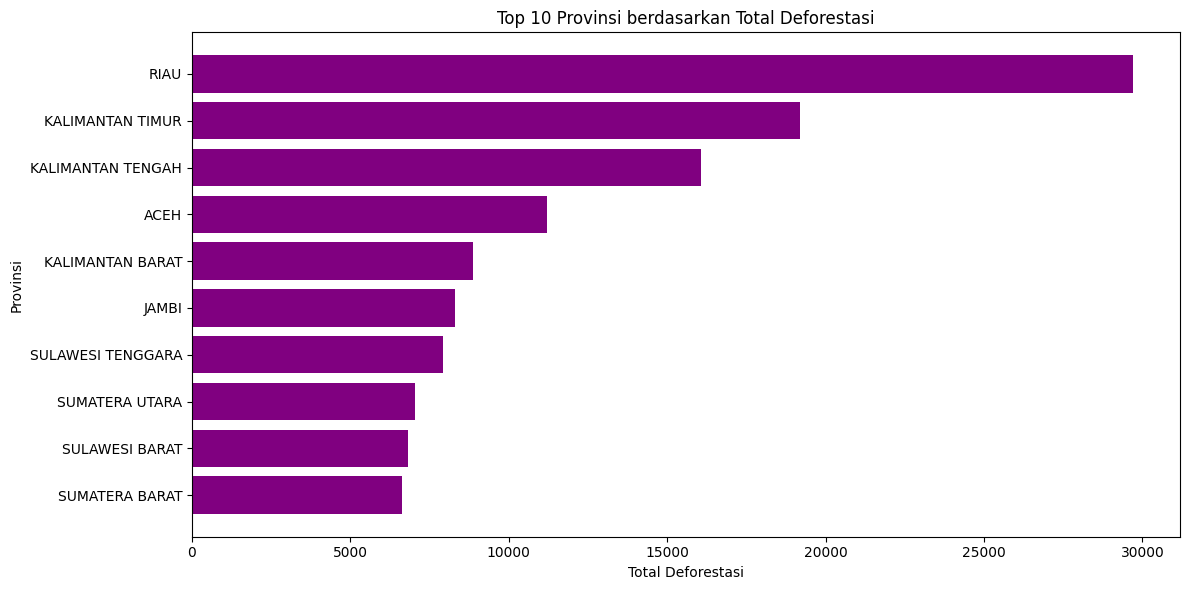

In [335]:
import matplotlib.pyplot as plt

# Ambil 10 provinsi dengan deforestasi terbesar
top10 = df.nlargest(10, 'Total_Deforestasi')

plt.figure(figsize=(12, 6))
plt.barh(top10['PROVINSI'], top10['Total_Deforestasi'], color='purple')  # Coral orange

plt.xlabel('Total Deforestasi')
plt.ylabel('Provinsi')
plt.title('Top 10 Provinsi berdasarkan Total Deforestasi')

plt.gca().invert_yaxis()  # Agar ranking terbesar muncul di atas
plt.tight_layout()
plt.show()

In [336]:
df.to_csv('dataset_dengan_feature_engineering.csv', index=False, encoding='utf-8')

###dataset siap 2

In [337]:
df2 = pd.read_csv('dataset2_cleaned.csv')
display(df2.head())

# Backup dataframe
df2_original = df2.copy()

,Unnamed: 0,PROVINSI,Total_Deforestasi,Luas_Perkebunan_Rakyat,Luas_Perkebunan_Negara,Luas_Perkebunan_Swasta,Produksi_Sawit
0,0,ACEH,11208.5,178592,27724,145607,106053
1,1,BALI,0.0,0,0,0,0
2,2,BANTEN,128.1,3782,10324,1590,3477
3,3,BENGKULU,4874.5,272649,857,87563,130576
4,4,DI YOGYAKARTA,27.2,0,0,0,0


###fitur rasio - produktivitas

In [338]:
# Total luas perkebunan
df2['Total_Luas'] = df2['Luas_Perkebunan_Rakyat'] + df2['Luas_Perkebunan_Negara'] + df2['Luas_Perkebunan_Swasta']

# Produktivitas sawit (ton/ha)
df2['Produktivitas_Sawit'] = np.where(
    df2['Total_Luas'] > 0,
    df2['Produksi_Sawit'] / df2['Total_Luas'],
    0
)

# Produktivitas per status kepemilikan
df2['Produktivitas_Rakyat_per_Ha'] = np.where(df2['Luas_Perkebunan_Rakyat'] > 0, df2['Produksi_Sawit'] / df2['Luas_Perkebunan_Rakyat'], 0)
df2['Produktivitas_Negara_per_Ha'] = np.where(df2['Luas_Perkebunan_Negara'] > 0, df2['Produksi_Sawit'] / df2['Luas_Perkebunan_Negara'], 0)
df2['Produktivitas_Swasta_per_Ha'] = np.where(df2['Luas_Perkebunan_Swasta'] > 0, df2['Produksi_Sawit'] / df2['Luas_Perkebunan_Swasta'], 0)

print("\nFitur Produktivitas (sample):")
display(df2[['PROVINSI', 'Total_Luas', 'Produksi_Sawit', 'Produktivitas_Sawit']].head())


Fitur Produktivitas (sample):


,PROVINSI,Total_Luas,Produksi_Sawit,Produktivitas_Sawit
0,ACEH,351923,106053,0.301353
1,BALI,0,0,0.000000
2,BANTEN,15696,3477,0.221521
3,BENGKULU,361069,130576,0.361637
4,DI YOGYAKARTA,0,0,0.000000


###FITUR RASIO - INTENSITAS DEFORESTASI

In [339]:
# Deforestasi per hektar perkebunan
df2['Intensitas_Deforestasi'] = np.where(
    df2['Total_Luas'] > 0,
    df2['Total_Deforestasi'] / df2['Total_Luas'],
    0
)

# Efisiensi produksi terhadap deforestasi
df2['Produksi_per_Deforestasi'] = np.where(
    df2['Total_Deforestasi'] > 0,
    df2['Produksi_Sawit'] / df2['Total_Deforestasi'],
    0
)

print("\nFitur Intensitas (sample):")
display(df2[['PROVINSI', 'Total_Deforestasi', 'Total_Luas',
            'Intensitas_Deforestasi', 'Produksi_per_Deforestasi']].head())


Fitur Intensitas (sample):


,PROVINSI,Total_Deforestasi,Total_Luas,Intensitas_Deforestasi,Produksi_per_Deforestasi
0,ACEH,11208.5,351923,0.031849,9.461837
1,BALI,0.0,0,0.000000,0.000000
2,BANTEN,128.1,15696,0.008161,27.142857
3,BENGKULU,4874.5,361069,0.013500,26.787568
4,DI YOGYAKARTA,27.2,0,0.000000,0.000000


###fitur proporsi - status kepemilikan

In [340]:
# Persentase luas per status kepemilikan
df2['Proporsi_Luas_Perkebunan_Rakyat%'] = np.where(df2['Total_Luas'] > 0, (df2['Luas_Perkebunan_Rakyat'] / df2['Total_Luas'] * 100).round(2), 0)
df2['Proporsi_Luas_Perkebunan_Negara%'] = np.where(df2['Total_Luas'] > 0, (df2['Luas_Perkebunan_Negara'] / df2['Total_Luas'] * 100).round(2), 0)
df2['Proporsi_Luas_Perkebunan_Swasta%'] = np.where(df2['Total_Luas'] > 0, (df2['Luas_Perkebunan_Swasta'] / df2['Total_Luas'] * 100).round(2), 0)
# Status dominan
def status_dominan(row):
    if row['Total_Luas'] == 0:
        return 'Tidak Ada'
    max_val = max(row['Luas_Perkebunan_Rakyat'], row['Luas_Perkebunan_Negara'], row['Luas_Perkebunan_Swasta'])
    if row['Luas_Perkebunan_Rakyat'] == max_val:
        return 'Rakyat'
    elif row['Luas_Perkebunan_Negara'] == max_val:
        return 'Negara'
    else:
        return 'Swasta'

df2['Status_Dominan'] = df2.apply(status_dominan, axis=1)

print("\nFitur Proporsi (sample):")
display(df2[['PROVINSI', 'Proporsi_Luas_Perkebunan_Rakyat%', 'Proporsi_Luas_Perkebunan_Negara%',
            'Proporsi_Luas_Perkebunan_Swasta%', 'Status_Dominan']].head())

print("\nDistribusi Status Dominan:")
print(df2['Status_Dominan'].value_counts())


Fitur Proporsi (sample):


,PROVINSI,Proporsi_Luas_Perkebunan_Rakyat%,Proporsi_Luas_Perkebunan_Negara%,Proporsi_Luas_Perkebunan_Swasta%,Status_Dominan
0,ACEH,50.75,7.88,41.37,Rakyat
1,BALI,0.00,0.00,0.00,Tidak Ada
2,BANTEN,24.10,65.77,10.13,Negara
3,BENGKULU,75.51,0.24,24.25,Rakyat
4,DI YOGYAKARTA,0.00,0.00,0.00,Tidak Ada



Distribusi Status Dominan:
Status_Dominan
Swasta       16
Rakyat        8
Tidak Ada     8
Negara        2
Name: count, dtype: int64


###FITUR KATEGORISASI - KATEGORI DEFORESTASI

In [341]:
# Kategori deforestasi berdasarkan quartile
def kategorisasi_deforestasi(value, data):
    if value == 0:
        return 'Tidak Ada'
    elif value <= data['Total_Deforestasi'].quantile(0.25):
        return 'Rendah'
    elif value <= data['Total_Deforestasi'].quantile(0.50):
        return 'Sedang'
    elif value <= data['Total_Deforestasi'].quantile(0.75):
        return 'Tinggi'
    else:
        return 'Sangat Tinggi'

df2['Kategori_Deforestasi'] = df2['Total_Deforestasi'].apply(lambda x: kategorisasi_deforestasi(x, df2))

# Kategori luas perkebunan
def kategorisasi_luas(value, data):
    if value == 0:
        return 'Tidak Ada'
    elif value <= data['Total_Luas'].quantile(0.33):
        return 'Kecil'
    elif value <= data['Total_Luas'].quantile(0.67):
        return 'Sedang'
    else:
        return 'Besar'

df2['Kategori_Luas'] = df2['Total_Luas'].apply(lambda x: kategorisasi_luas(x, df2))

# Kategori produktivitas
def kategorisasi_produktivitas(value):
    if value == 0:
        return 'Tidak Produktif'
    elif value < 10:
        return 'Rendah'
    elif value <= 20:
        return 'Sedang'
    else:
        return 'Tinggi'

df2['Kategori_Produktivitas'] = df2['Produktivitas_Sawit'].apply(kategorisasi_produktivitas)

print(df2['Kategori_Deforestasi'].value_counts())
print(df2['Kategori_Luas'].value_counts())
print(df2['Kategori_Produktivitas'].value_counts())

Kategori_Deforestasi
Sangat Tinggi    9
Rendah           8
Tinggi           8
Sedang           8
Tidak Ada        1
Name: count, dtype: int64
Kategori_Luas
Sedang       12
Besar        11
Tidak Ada     8
Kecil         3
Name: count, dtype: int64
Kategori_Produktivitas
Rendah             26
Tidak Produktif     8
Name: count, dtype: int64


###FITUR REGIONAL - PENGELOMPOKAN PULAU

In [342]:
def assign_region(provinsi):
    prov = provinsi.upper()
    if any(x in prov for x in ['ACEH', 'SUMATERA', 'RIAU', 'JAMBI', 'BENGKULU',
                                'LAMPUNG', 'BANGKA', 'BELITUNG']):
        return 'SUMATERA'
    elif any(x in prov for x in ['JAKARTA', 'JAWA', 'BANTEN', 'YOGYAKARTA']):
        return 'JAWA'
    elif any(x in prov for x in ['BALI', 'NUSA TENGGARA']):
        return 'BALI & NUSA TENGGARA'
    elif 'KALIMANTAN' in prov:
        return 'KALIMANTAN'
    elif 'SULAWESI' in prov or 'GORONTALO' in prov:
        return 'SULAWESI'
    elif 'MALUKU' in prov or 'PAPUA' in prov:
        return 'MALUKU & PAPUA'
    else:
        return 'LAINNYA'

df2['Pulau'] = df2['PROVINSI'].apply(assign_region)

print("\nDistribusi Regional:")
print(df2['Pulau'].value_counts())


Distribusi Regional:
Pulau
SUMATERA                10
JAWA                     6
SULAWESI                 6
KALIMANTAN               5
MALUKU & PAPUA           4
BALI & NUSA TENGGARA     3
Name: count, dtype: int64


###FITUR BOOLEAN/FLAG

In [343]:
# Flag dasar
df2['Ada_Perkebunan'] = (df2['Total_Luas'] > 0).astype(int)
df2['Ada_Produksi'] = (df2['Produksi_Sawit'] > 0).astype(int)
df2['Ada_Deforestasi'] = (df2['Total_Deforestasi'] > 0).astype(int)

# Flag khusus
df2['Deforestasi_Tinggi_Produktif'] = (
    (df2['Total_Deforestasi'] > df2['Total_Deforestasi'].median()) &
    (df2['Produktivitas_Sawit'] > df2['Produktivitas_Sawit'].median())
).astype(int)

df2['Rakyat_Dominan'] = (df2['Status_Dominan'] == 'Rakyat').astype(int)
df2['Swasta_Dominan'] = (df2['Status_Dominan'] == 'Swasta').astype(int)

print("\nRingkasan Flag:")
flags = ['Ada_Perkebunan', 'Ada_Produksi', 'Ada_Deforestasi',
         'Deforestasi_Tinggi_Produktif', 'Rakyat_Dominan', 'Swasta_Dominan']
for flag in flags:
    print(f"  {flag}: {df2[flag].sum()} provinsi")


Ringkasan Flag:
  Ada_Perkebunan: 26 provinsi
  Ada_Produksi: 26 provinsi
  Ada_Deforestasi: 31 provinsi
  Deforestasi_Tinggi_Produktif: 11 provinsi
  Rakyat_Dominan: 8 provinsi
  Swasta_Dominan: 16 provinsi


###FITUR SCALING - NORMALISASI (0-100)

In [344]:
scaler = MinMaxScaler(feature_range=(0, 100))

# Normalisasi fitur utama
df2['Deforestasi_Score'] = scaler.fit_transform(df2[['Total_Deforestasi']]).round(2)
df2['Luas_Score'] = scaler.fit_transform(df2[['Total_Luas']]).round(2)
df2['Produksi_Score'] = scaler.fit_transform(df2[['Produksi_Sawit']]).round(2)
df2['Produktivitas_Score'] = scaler.fit_transform(df2[['Produktivitas_Sawit']]).round(2)

# Composite Score (rata-rata weighted)
df2['Impact_Score'] = (
    df2['Deforestasi_Score'] * 0.4 +
    df2['Luas_Score'] * 0.3 +
    df2['Produksi_Score'] * 0.3
).round(2)

print("\nFitur Score (sample):")
display(df2[['PROVINSI', 'Deforestasi_Score', 'Luas_Score',
            'Produksi_Score', 'Impact_Score']].head())


Fitur Score (sample):


,PROVINSI,Deforestasi_Score,Luas_Score,Produksi_Score,Impact_Score
0,ACEH,37.85,15.17,12.52,23.45
1,BALI,0.18,0.00,0.00,0.07
2,BANTEN,0.61,0.68,0.41,0.57
3,BENGKULU,16.57,15.57,15.41,15.92
4,DI YOGYAKARTA,0.28,0.00,0.00,0.11


###FITUR RANKING

In [345]:
# Ranking berbagai metrik
df2['Total_Luas'] = df2['Total_Luas'].fillna(0) # Fill NaN values with 0 before ranking
df2['Rank_Deforestasi'] = df2['Total_Deforestasi'].rank(ascending=False, method='dense').astype(int)
df2['Rank_Luas'] = df2['Total_Luas'].rank(ascending=False, method='dense').astype(int)
df2['Rank_Produksi'] = df2['Produksi_Sawit'].rank(ascending=False, method='dense').astype(int)
df2['Rank_Produktivitas'] = df2['Produktivitas_Sawit'].rank(ascending=False, method='dense').astype(int)
print("\nTop 10 berdasarkan Rank Deforestasi:")
display(df2.nsmallest(10, 'Rank_Deforestasi')[
    ['PROVINSI', 'Total_Deforestasi', 'Rank_Deforestasi',
     'Total_Luas', 'Rank_Luas', 'Impact_Score']
])


Top 10 berdasarkan Rank Deforestasi:


,PROVINSI,Total_Deforestasi,Rank_Deforestasi,Total_Luas,Rank_Luas,Impact_Score
25,RIAU,29702.1,1,2319373,1,73.32
14,KALIMANTAN TIMUR,19206.8,2,1191084,4,55.26
13,KALIMANTAN TENGAH,16054.3,3,1912526,2,76.39
0,ACEH,11208.5,4,351923,11,23.45
11,KALIMANTAN BARAT,8878.7,5,1823474,3,37.52
7,JAMBI,8290.6,6,789511,7,29.34
29,SULAWESI TENGGARA,7925.9,7,51096,19,11.42
33,SUMATERA UTARA,7034.9,8,1138865,5,42.17
26,SULAWESI BARAT,6824.3,9,109307,17,12.03
31,SUMATERA BARAT,6634.2,10,364078,9,14.20


###fitur interaksi

In [346]:
# Interaksi antara deforestasi dan kepemilikan
df2['Deforestasi_x_Luas_Perkebunan_Rakyat'] = df2['Total_Deforestasi'] * df2['Proporsi_Luas_Perkebunan_Rakyat%'] / 100
df2['Deforestasi_x_Luas_Perkebunan_Negara'] = df2['Total_Deforestasi'] * df2['Proporsi_Luas_Perkebunan_Negara%'] / 100
df2['Deforestasi_x_Luas_Perkebunan_Swasta'] = df2['Total_Deforestasi'] * df2['Proporsi_Luas_Perkebunan_Swasta%'] / 100

# Rasio produktivitas
df2['Rasio_Produktivitas_Rakyat_Swasta'] = np.where(
    df2['Produktivitas_Swasta_per_Ha'] > 0,
    df2['Produktivitas_Rakyat_per_Ha'] / df2['Produktivitas_Swasta_per_Ha'],
    0
)

df2['Rasio_Produktivitas_Rakyat_Negara'] = np.where(
    df2['Produktivitas_Negara_per_Ha'] > 0,
    df2['Produktivitas_Rakyat_per_Ha'] / df2['Produktivitas_Negara_per_Ha'],
    0
)

df2['Rasio_Produktivitas_Negara_Swasta'] = np.where(
    df2['Produktivitas_Swasta_per_Ha'] > 0,
    df2['Produktivitas_Negara_per_Ha'] / df2['Produktivitas_Swasta_per_Ha'],
    0
)

print("\nFitur Interaksi (sample):")
display(df2[['PROVINSI', 'Deforestasi_x_Luas_Perkebunan_Rakyat', 'Deforestasi_x_Luas_Perkebunan_Negara', 'Deforestasi_x_Luas_Perkebunan_Swasta']].head())


Fitur Interaksi (sample):


,PROVINSI,Deforestasi_x_Luas_Perkebunan_Rakyat,Deforestasi_x_Luas_Perkebunan_Negara,Deforestasi_x_Luas_Perkebunan_Swasta
0,ACEH,5688.31375,883.22980,4636.95645
1,BALI,0.00000,0.00000,0.00000
2,BANTEN,30.87210,84.25137,12.97653
3,BENGKULU,3680.73495,11.69880,1182.06625
4,DI YOGYAKARTA,0.00000,0.00000,0.00000


In [347]:
output_file = 'dataset2_dengan_feature_engineering.csv'
df2.to_csv(output_file, index=False, encoding='utf-8')

In [348]:
import pandas as pd
import numpy as np

# Load datasets
df1 = pd.read_csv('dataset_dengan_feature_engineering.csv')
df2 = pd.read_csv('dataset2_dengan_feature_engineering.csv')

print("="*80)
print("DATASET 1 - URUTAN KOLOM SEBELUM PENGATURAN ULANG")
print("="*80)
print(f"Total kolom: {len(df1.columns)}")
print("\nUrutan kolom:")
for i, col in enumerate(df1.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*80)
print("DATASET 2 - URUTAN KOLOM SEBELUM PENGATURAN ULANG")
print("="*80)
print(f"Total kolom: {len(df2.columns)}")
print("\nUrutan kolom:")
for i, col in enumerate(df2.columns, 1):
    print(f"{i:2d}. {col}")

# Identifikasi kolom yang mengandung 'total' (case-insensitive)
def identify_total_columns(df):
    """Identifikasi semua kolom yang mengandung kata 'total'"""
    total_cols = [col for col in df.columns if 'total' in col.lower()]
    return total_cols

# Fungsi untuk memindahkan kolom total ke akhir
def move_total_to_end(df):
    """Memindahkan semua kolom yang mengandung 'total' ke posisi akhir"""
    total_cols = identify_total_columns(df)

    if not total_cols:
        print("⚠️ Tidak ada kolom dengan kata 'total' ditemukan")
        return df

    # Pisahkan kolom non-total dan total
    other_cols = [col for col in df.columns if col not in total_cols]

    # Gabungkan: kolom lain dulu, kemudian kolom total
    new_order = other_cols + total_cols

    return df[new_order]

# Identifikasi kolom total pada kedua dataset
print("\n" + "="*80)
print("IDENTIFIKASI KOLOM 'TOTAL'")
print("="*80)

total_cols_df1 = identify_total_columns(df1)
total_cols_df2 = identify_total_columns(df2)

print(f"\nDataset 1 - Kolom yang mengandung 'total': {total_cols_df1}")
print(f"Dataset 2 - Kolom yang mengandung 'total': {total_cols_df2}")

# Atur ulang urutan kolom
df1_reordered = move_total_to_end(df1)
df2_reordered = move_total_to_end(df2)

print("\n" + "="*80)
print("DATASET 1 - URUTAN KOLOM SETELAH PENGATURAN ULANG")
print("="*80)
print(f"Total kolom: {len(df1_reordered.columns)}")
print("\nUrutan kolom:")
for i, col in enumerate(df1_reordered.columns, 1):
    marker = " ← TOTAL" if 'total' in col.lower() else ""
    print(f"{i:2d}. {col}{marker}")

print("\n" + "="*80)
print("DATASET 2 - URUTAN KOLOM SETELAH PENGATURAN ULANG")
print("="*80)
print(f"Total kolom: {len(df2_reordered.columns)}")
print("\nUrutan kolom:")
for i, col in enumerate(df2_reordered.columns, 1):
    marker = " ← TOTAL" if 'total' in col.lower() else ""
    print(f"{i:2d}. {col}{marker}")

# Verifikasi bahwa data tidak berubah
print("\n" + "="*80)
print("VERIFIKASI DATA")
print("="*80)

# Cek shape
print(f"\nDataset 1 - Shape sebelum: {df1.shape}, setelah: {df1_reordered.shape}")
print(f"Dataset 2 - Shape sebelum: {df2.shape}, setelah: {df2_reordered.shape}")

# Cek apakah nilai data sama (hanya urutan kolom yang berubah)
df1_check = df1[df1_reordered.columns].equals(df1_reordered)
df2_check = df2[df2_reordered.columns].equals(df2_reordered)

print(f"\nDataset 1 - Nilai data tidak berubah: {'✓' if df1_check else '✗'}")
print(f"Dataset 2 - Nilai data tidak berubah: {'✓' if df2_check else '✗'}")

# Preview data setelah pengaturan ulang
print("\n" + "="*80)
print("PREVIEW DATASET 1 (5 baris pertama)")
print("="*80)
print(df1_reordered.head())

print("\n" + "="*80)
print("PREVIEW DATASET 2 (5 baris pertama)")
print("="*80)
print(df2_reordered.head())

# Export ke file baru
df1_reordered.to_csv('DATASET1_FINAL.CSV',
                     index=False, encoding='utf-8')
df2_reordered.to_csv('DATASET2_FINAL.CSV',
                     index=False, encoding='utf-8')

print("\n" + "="*80)
print("FILE BERHASIL DIEKSPOR")
print("="*80)
print("✓ DATASET1_FINAL.CSV")
print("✓ DATASET2_FINAL.CSV")
print("\nKolom 'total' sekarang berada di posisi paling akhir!")
print("="*80)

DATASET 1 - URUTAN KOLOM SEBELUM PENGATURAN ULANG
Total kolom: 21

Urutan kolom:
 1. Unnamed: 0
 2. PROVINSI
 3. Luas_Perkebunan_Sawit
 4. Produksi_Sawit
 5. Total_Deforestasi
 6. Produktivitas_Sawit
 7. Intensitas_Deforestasi
 8. Produksi_per_Deforestasi
 9. Kategori_Deforestasi
10. Pulau
11. Ada_Perkebunan_Sawit
12. Ada_Produksi_Sawit
13. Ada_Deforestasi
14. Deforestasi_Tinggi_Tanpa_Perkebunan
15. Deforestasi_Score
16. Luas_Perkebunan_Score
17. Produksi_Score
18. Rank_Deforestasi
19. Rank_Luas_Perkebunan
20. Rank_Produksi
21. Rank_Produktivitas

DATASET 2 - URUTAN KOLOM SEBELUM PENGATURAN ULANG
Total kolom: 43

Urutan kolom:
 1. Unnamed: 0
 2. PROVINSI
 3. Total_Deforestasi
 4. Luas_Perkebunan_Rakyat
 5. Luas_Perkebunan_Negara
 6. Luas_Perkebunan_Swasta
 7. Produksi_Sawit
 8. Total_Luas
 9. Produktivitas_Sawit
10. Produktivitas_Rakyat_per_Ha
11. Produktivitas_Negara_per_Ha
12. Produktivitas_Swasta_per_Ha
13. Intensitas_Deforestasi
14. Produksi_per_Deforestasi
15. Proporsi_Luas_Perkeb

#**Data Exploration**

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset hasil feature engineering
df1 = pd.read_csv('DATASET1_FINAL.CSV')
df2 = pd.read_csv('DATASET2_FINAL.CSV')

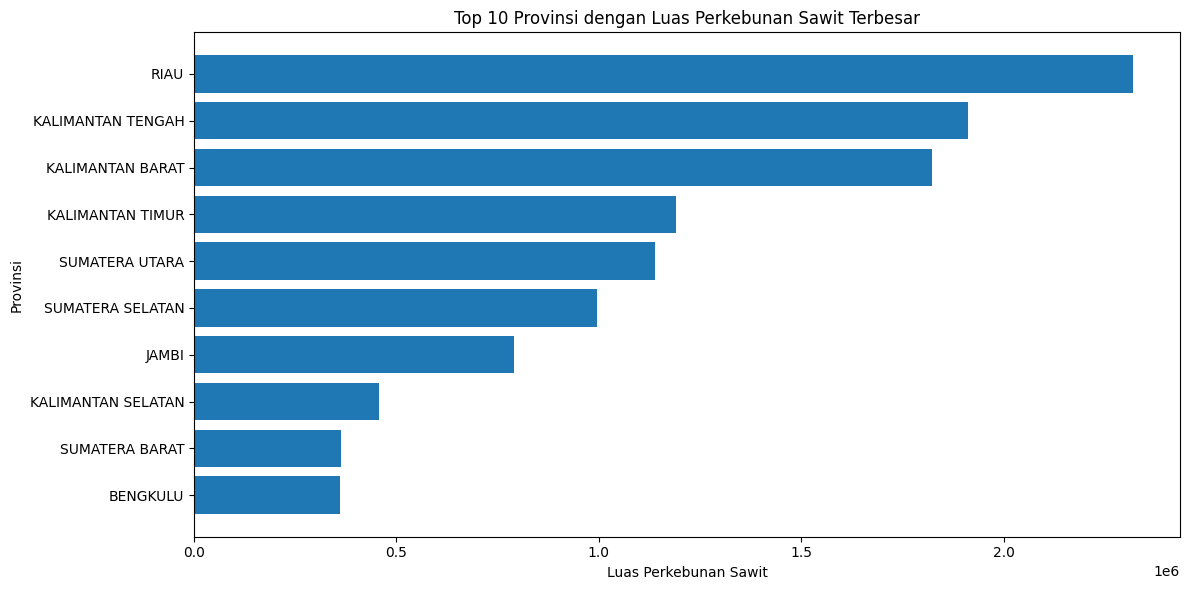

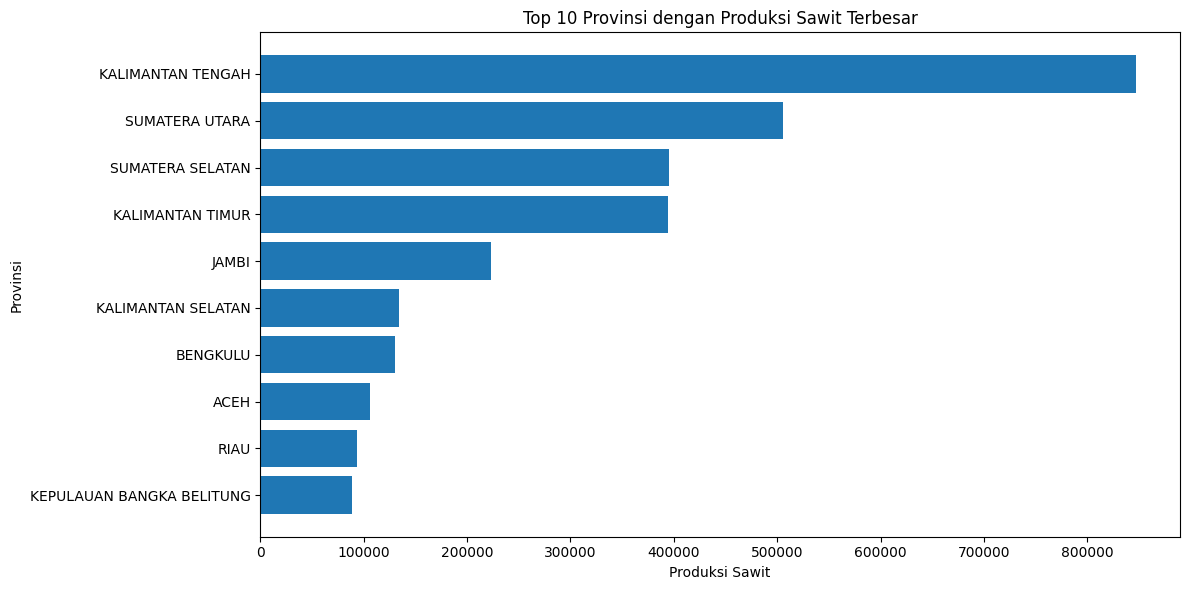

In [350]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df1 = pd.read_csv('DATASET1_FINAL.CSV')

# ---- Top Luas Perkebunan Sawit ----
top_luas = df1.nlargest(10, 'Luas_Perkebunan_Sawit')

plt.figure(figsize=(12, 6))
plt.barh(top_luas['PROVINSI'], top_luas['Luas_Perkebunan_Sawit'])
plt.xlabel("Luas Perkebunan Sawit")
plt.ylabel("Provinsi")
plt.title("Top 10 Provinsi dengan Luas Perkebunan Sawit Terbesar")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ---- Top Produksi Sawit ----
top_produksi = df1.nlargest(10, 'Produksi_Sawit')

plt.figure(figsize=(12, 6))
plt.barh(top_produksi['PROVINSI'], top_produksi['Produksi_Sawit'])
plt.xlabel("Produksi Sawit")
plt.ylabel("Provinsi")
plt.title("Top 10 Provinsi dengan Produksi Sawit Terbesar")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##dataset 1

## eksplorasi univariate (OVERVIEW STATISTIK)

In [351]:
fitur_utama = ['Total_Deforestasi', 'Luas_Perkebunan_Sawit', 'Produksi_Sawit',
               'Produktivitas_Sawit', 'Intensitas_Deforestasi', 'Produksi_per_Deforestasi']
display(df1[fitur_utama].describe().T)

,count,mean,std,min,25%,50%,75%,max
Total_Deforestasi,34.0,5159.935294,6324.727243,-54.8,452.675000,4112.850000,6776.775000,2.970210e+04
Luas_Perkebunan_Sawit,34.0,377905.852941,617830.374277,0.0,5878.000000,83536.500000,363325.750000,2.319372e+06
Produksi_Sawit,34.0,96104.558824,182651.752939,0.0,392.500000,11093.500000,92480.000000,8.473320e+05
Produktivitas_Sawit,34.0,0.203695,0.176168,0.0,0.015898,0.239310,0.359386,5.065876e-01
Intensitas_Deforestasi,34.0,0.037002,0.057087,0.0,0.001905,0.012305,0.046516,2.384372e-01
Produksi_per_Deforestasi,34.0,20.138762,40.971915,0.0,0.111768,5.886147,23.987840,2.156379e+02


## ekplorasi bivariate

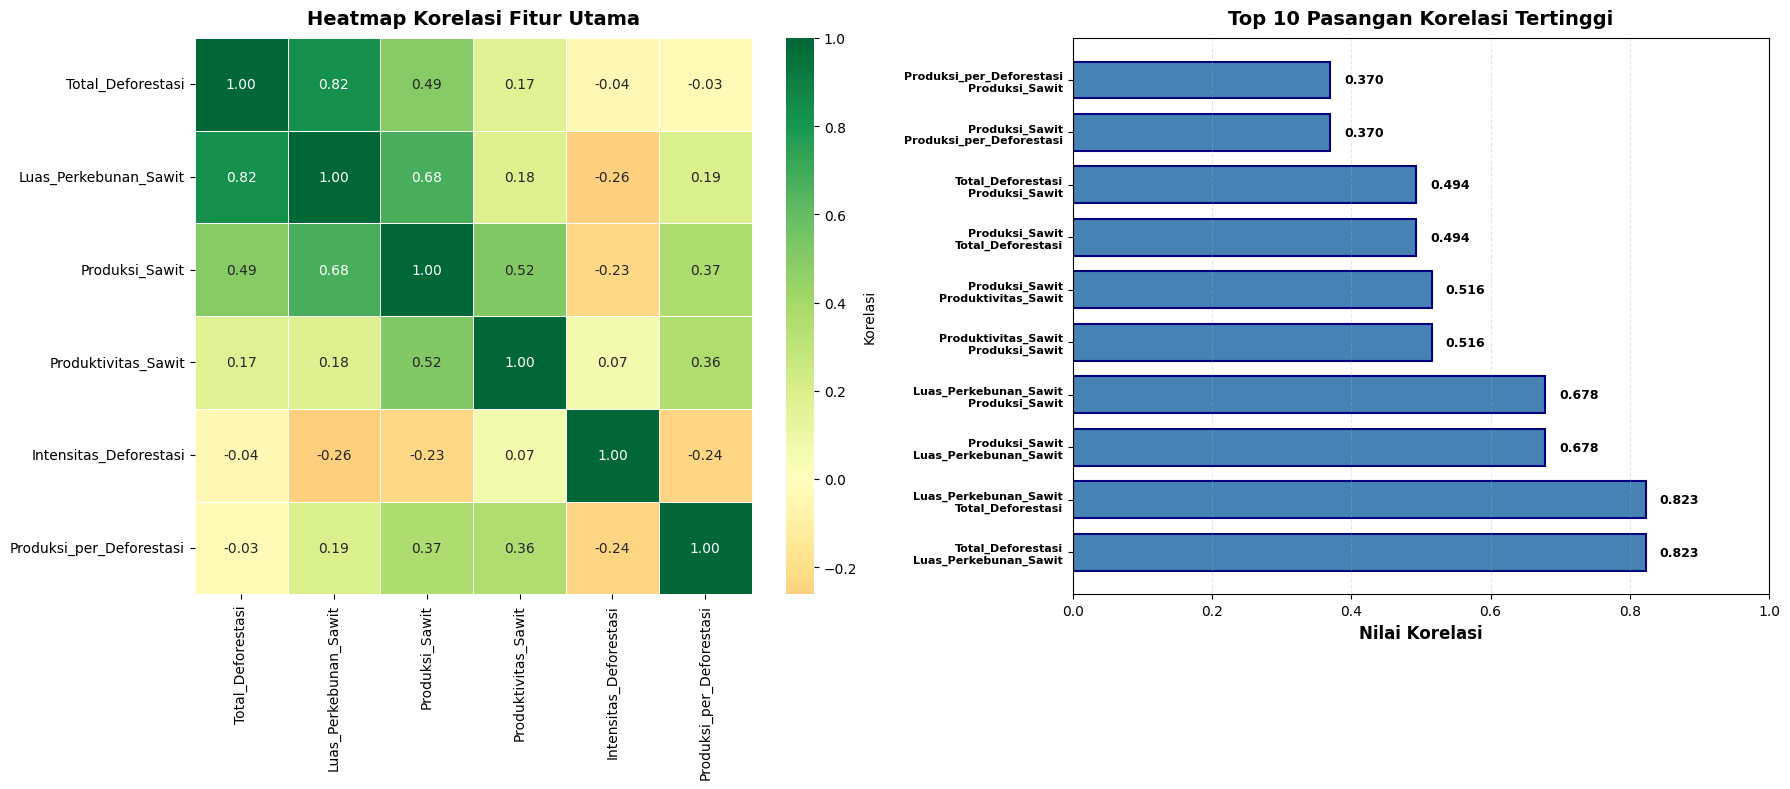

In [352]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
corr_matrix = df1[fitur_utama].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0, ax=ax[0],
            cbar_kws={'label': 'Korelasi'}, linewidths=0.5)
ax[0].set_title('Heatmap Korelasi Fitur Utama', fontsize=14, fontweight='bold', pad=10)

# Top 10 korelasi tertinggi
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1].head(10).reset_index()
corr_pairs.columns = ['Var1', 'Var2', 'Correlation']

# Buat label 2 baris terpisah
labels = [f"{row['Var1']}\n{row['Var2']}" for _, row in corr_pairs.iterrows()]

bars = ax[1].barh(range(len(corr_pairs)), corr_pairs['Correlation'],
                  color='steelblue', edgecolor='navy', linewidth=1.5, height=0.7)
ax[1].set_yticks(range(len(corr_pairs)))
ax[1].set_yticklabels(labels, fontsize=8, fontweight='bold')
ax[1].set_xlabel('Nilai Korelasi', fontsize=12, fontweight='bold')
ax[1].set_title('Top 10 Pasangan Korelasi Tertinggi', fontsize=14, fontweight='bold', pad=10)
ax[1].grid(axis='x', alpha=0.3, linestyle='--')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(-0.8, len(corr_pairs) - 0.2)  # Tambah spacing agar tidak overlap

# Tambahkan nilai di ujung bar
for i, (bar, val) in enumerate(zip(bars, corr_pairs['Correlation'])):
    ax[1].text(val + 0.02, i, f'{val:.3f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## distribusi kategorikal

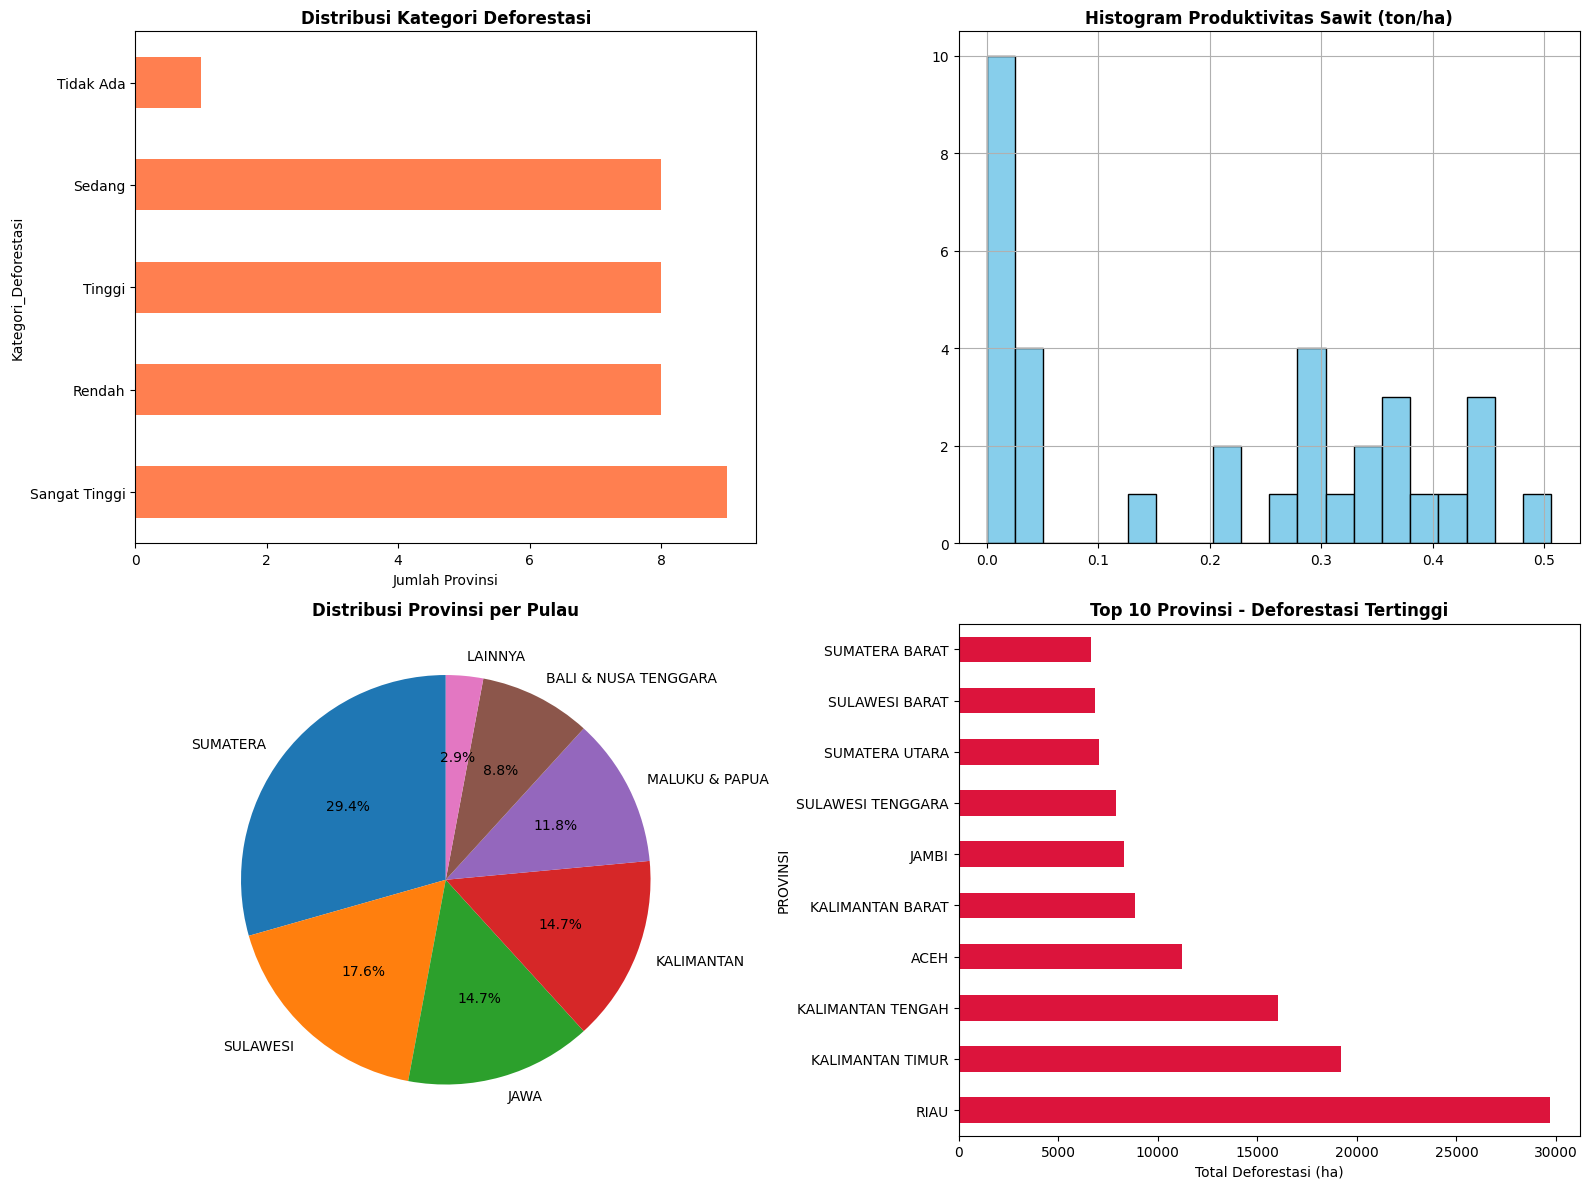

In [353]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
# Kategori Deforestasi
df1['Kategori_Deforestasi'].value_counts().plot(kind='barh', ax=ax[0,0], color='coral')
ax[0,0].set_title('Distribusi Kategori Deforestasi', fontweight='bold')
ax[0,0].set_xlabel('Jumlah Provinsi')
# Kategori Produktivitas (dari dataset 2 jika ada, atau buat dari df1)
if 'Kategori_Produktivitas' in df1.columns:
    df1['Kategori_Produktivitas'].value_counts().plot(kind='bar', ax=ax[0,1], color='skyblue')
    ax[0,1].set_title('Distribusi Kategori Produktivitas', fontweight='bold')
else:
    df1['Produktivitas_Sawit'].hist(bins=20, ax=ax[0,1], color='skyblue', edgecolor='black')
    ax[0,1].set_title('Histogram Produktivitas Sawit (ton/ha)', fontweight='bold')
# Regional Distribution
df1['Pulau'].value_counts().plot(kind='pie', ax=ax[1,0], autopct='%1.1f%%', startangle=90)
ax[1,0].set_ylabel('')
ax[1,0].set_title('Distribusi Provinsi per Pulau', fontweight='bold')
# Top 10 Deforestasi
df1.nlargest(10, 'Total_Deforestasi').plot(x='PROVINSI', y='Total_Deforestasi', kind='barh', ax=ax[1,1], color='crimson', legend=False)
ax[1,1].set_title('Top 10 Provinsi - Deforestasi Tertinggi', fontweight='bold')
ax[1,1].set_xlabel('Total Deforestasi (ha)')
plt.tight_layout()
plt.show()

## analisis regional

In [354]:
regional = df1.groupby('Pulau').agg({
    'Total_Deforestasi': ['sum', 'mean'],
    'Luas_Perkebunan_Sawit': ['sum', 'mean'],
    'Produksi_Sawit': ['sum', 'mean'],
    'Produktivitas_Sawit': 'mean',
    'PROVINSI': 'count'
}).round(2)
regional.columns = ['Deforestasi_Total', 'Deforestasi_Rata2', 'Luas_Total', 'Luas_Rata2',
                    'Produksi_Total', 'Produksi_Rata2', 'Produktivitas_Rata2', 'Jumlah_Provinsi']
display(regional.sort_values('Deforestasi_Total', ascending=False))

,Deforestasi_Total,Deforestasi_Rata2,Luas_Total,Luas_Rata2,Produksi_Total,Produksi_Rata2,Produktivitas_Rata2,Jumlah_Provinsi
Pulau,,,,,,,,
SUMATERA,78030.6,7803.06,6706181.0,670618.10,1605735,160573.50,0.29,10
KALIMANTAN,53496.4,10699.28,5585000.0,1117000.00,1492484,298496.80,0.28,5
SULAWESI,27200.6,4533.43,328724.0,54787.33,85441,14240.17,0.13,6
MALUKU & PAPUA,12264.5,3066.12,198542.0,49635.50,76069,19017.25,0.32,4
BALI & NUSA TENGGARA,3259.1,1086.37,0.0,0.00,0,0.00,0.00,3
JAWA,1159.4,231.88,30352.0,6070.40,7826,1565.20,0.10,5
LAINNYA,27.2,27.20,0.0,0.00,0,0.00,0.00,1


## dataset 2

## Statistik Deskriptif - Fitur Utama

In [359]:
fitur_utama2 = ['Total_Deforestasi', 'Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara', 'Luas_Perkebunan_Swasta', 'Total_Luas',
                'Produksi_Sawit', 'Produktivitas_Sawit', 'Proporsi_Luas_Perkebunan_Rakyat%', 'Proporsi_Luas_Perkebunan_Swasta%', 'Proporsi_Luas_Perkebunan_Negara%']
display(df2[fitur_utama2].describe().T)

,count,mean,std,min,25%,50%,75%,max
Total_Deforestasi,34.0,5159.935294,6324.727243,-54.8,452.675000,4112.850000,6776.775000,2.970210e+04
Luas_Perkebunan_Rakyat,34.0,139839.176471,265116.858717,0.0,46.000000,23490.500000,170215.250000,1.352806e+06
Luas_Perkebunan_Negara,34.0,14116.794118,45907.428320,0.0,0.000000,0.000000,9556.000000,2.616940e+05
Luas_Perkebunan_Swasta,34.0,223949.941176,402990.898419,0.0,1044.000000,41362.000000,172652.750000,1.616751e+06
Total_Luas,34.0,377905.911765,617830.430759,0.0,5878.000000,83537.500000,363325.750000,2.319373e+06
Produksi_Sawit,34.0,96104.558824,182651.752939,0.0,392.500000,11093.500000,92480.000000,8.473320e+05
Produktivitas_Sawit,34.0,0.203696,0.176167,0.0,0.015898,0.239309,0.359386,5.065836e-01
Proporsi_Luas_Perkebunan_Rakyat%,34.0,25.058235,25.279763,0.0,0.315000,17.480000,41.595000,8.093000e+01
Proporsi_Luas_Perkebunan_Swasta%,34.0,45.411471,35.541794,0.0,4.572500,42.735000,79.915000,1.000000e+02
Proporsi_Luas_Perkebunan_Negara%,34.0,6.001176,16.647147,0.0,0.000000,0.000000,2.247500,7.166000e+01


## analisis status kepemilikan

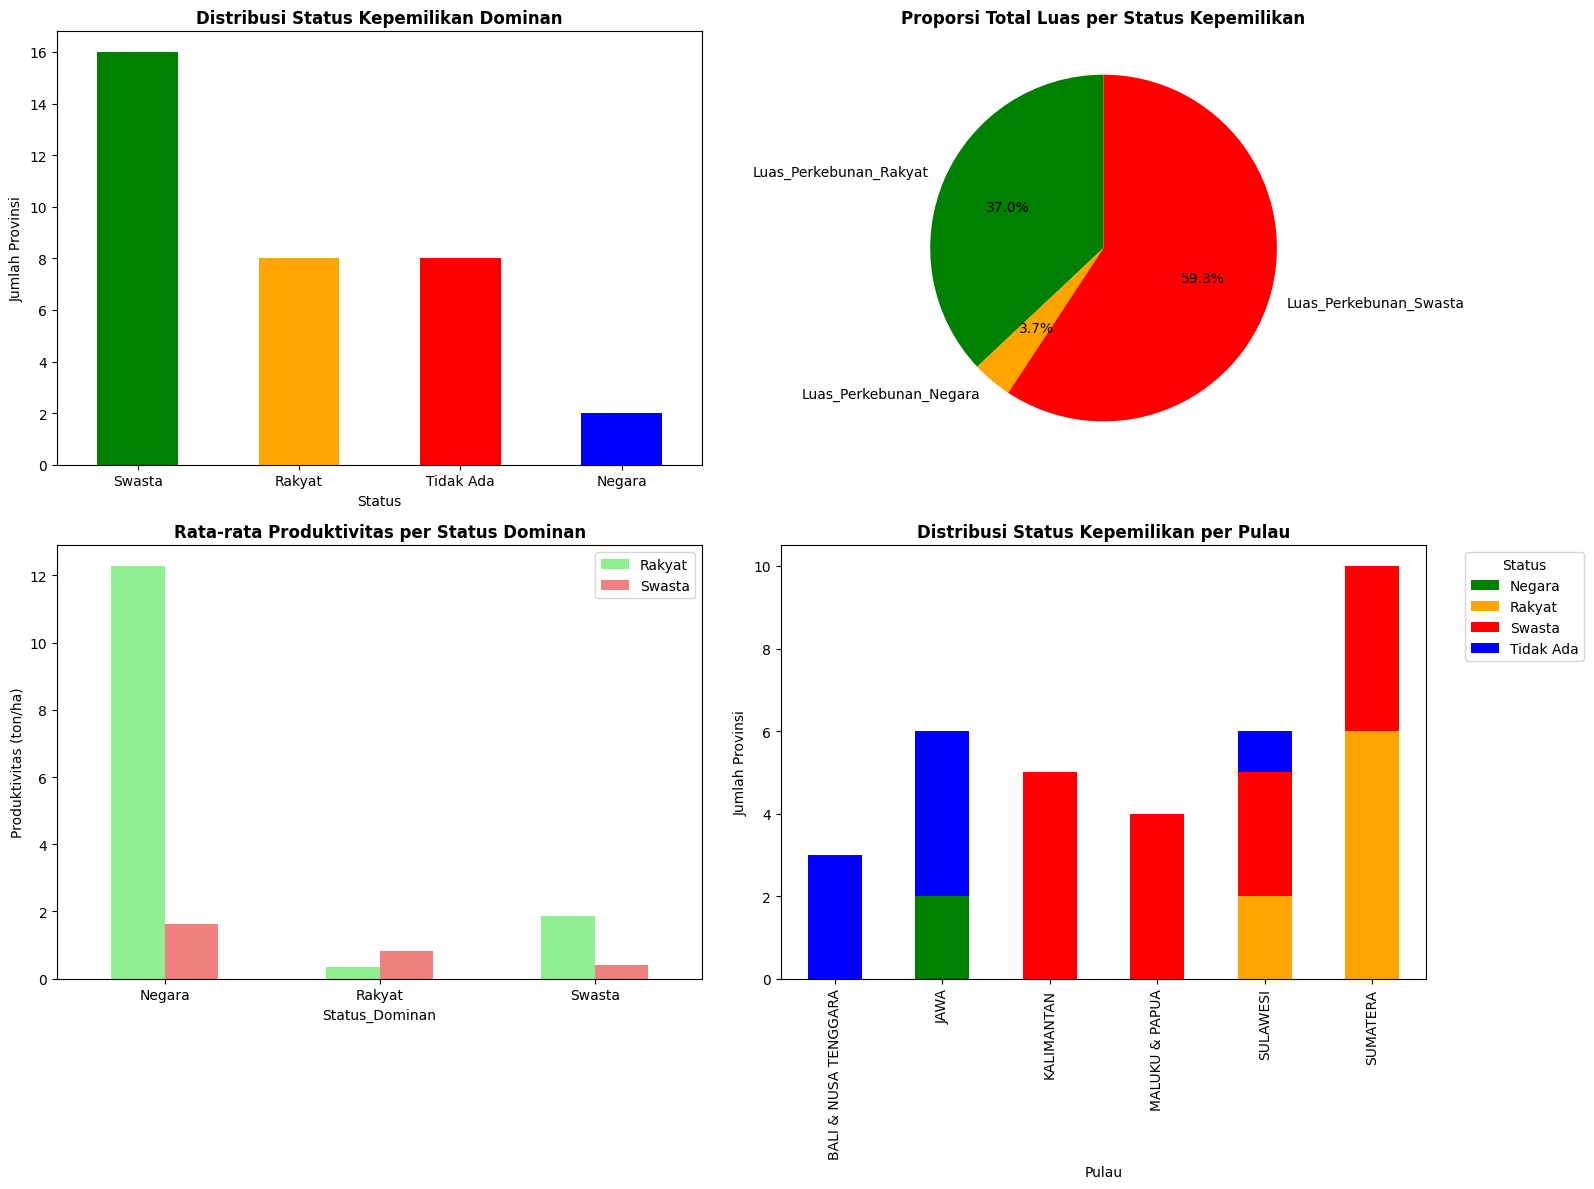

In [360]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
# Status Dominan
df2['Status_Dominan'].value_counts().plot(kind='bar', ax=ax[0,0], color=['green', 'orange', 'red', 'blue'])
ax[0,0].set_title('Distribusi Status Kepemilikan Dominan', fontweight='bold')
ax[0,0].set_xlabel('Status')
ax[0,0].set_ylabel('Jumlah Provinsi')
ax[0,0].tick_params(axis='x', rotation=0)
# Perbandingan Luas per Status
status_luas = df2[['Luas_Perkebunan_Rakyat', 'Luas_Perkebunan_Negara', 'Luas_Perkebunan_Swasta']].sum()
ax[0,1].pie(status_luas, labels=status_luas.index, autopct='%1.1f%%', startangle=90, colors=['green', 'orange', 'red'])
ax[0,1].set_title('Proporsi Total Luas per Status Kepemilikan', fontweight='bold')
# Produktivitas per Status
prod_per_status = df2[df2['Total_Luas'] > 0].groupby('Status_Dominan')[['Produktivitas_Rakyat_per_Ha', 'Produktivitas_Swasta_per_Ha']].mean()
prod_per_status.plot(kind='bar', ax=ax[1,0], color=['lightgreen', 'lightcoral'])
ax[1,0].set_title('Rata-rata Produktivitas per Status Dominan', fontweight='bold')
ax[1,0].set_ylabel('Produktivitas (ton/ha)')
ax[1,0].tick_params(axis='x', rotation=0)
ax[1,0].legend(['Rakyat', 'Swasta'])
# Regional + Status
regional_status = df2.groupby(['Pulau', 'Status_Dominan']).size().unstack(fill_value=0)
regional_status.plot(kind='bar', stacked=True, ax=ax[1,1], color=['green', 'orange', 'red', 'blue'])
ax[1,1].set_title('Distribusi Status Kepemilikan per Pulau', fontweight='bold')
ax[1,1].set_xlabel('Pulau')
ax[1,1].set_ylabel('Jumlah Provinsi')
ax[1,1].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analisis Komparatif Rakyat vs Swasta

In [361]:
komparasi = df2[df2['Total_Luas'] > 0].groupby('Status_Dominan').agg({
    'Luas_Perkebunan_Rakyat': 'sum', 'Luas_Perkebunan_Swasta': 'sum', 'Produksi_Sawit': 'sum',
    'Produktivitas_Rakyat_per_Ha': 'mean', 'Produktivitas_Swasta_per_Ha': 'mean', 'Total_Deforestasi': 'mean'
})
display(komparasi)

# 9. TOP INSIGHTS (Key Findings)
print("\n" + "="*70)
print("KEY INSIGHTS DARI EXPLORASI DATA")
print("="*70)
insights = {
    'Total Provinsi Analisis': len(df1),
    'Provinsi Deforestasi Tertinggi': df1.loc[df1['Total_Deforestasi'].idxmax(), 'PROVINSI'],
    'Total Deforestasi Nasional (ha)': f"{df1['Total_Deforestasi'].sum():,.0f}",
    'Total Luas Sawit Nasional (ha)': f"{df1['Luas_Perkebunan_Sawit'].sum():,.0f}",
    'Rata-rata Produktivitas (ton/ha)': f"{df1['Produktivitas_Sawit'].mean():.2f}",
    'Pulau dengan Deforestasi Tertinggi': df1.groupby('Pulau')['Total_Deforestasi'].sum().idxmax(),
    'Korelasi Deforestasi-Luas Sawit': f"{df1['Total_Deforestasi'].corr(df1['Luas_Perkebunan_Sawit']):.3f}",
    'Status Kepemilikan Dominan': df2['Status_Dominan'].mode()[0],
    'Provinsi dengan Produktivitas Tertinggi': df1.loc[df1['Produktivitas_Sawit'].idxmax(), 'PROVINSI']
}
for key, value in insights.items():
    print(f"  • {key}: {value}")

,Luas_Perkebunan_Rakyat,Luas_Perkebunan_Swasta,Produksi_Sawit,Produktivitas_Rakyat_per_Ha,Produktivitas_Swasta_per_Ha,Total_Deforestasi
Status_Dominan,,,,,,
Negara,3966,5559,7826,12.277612,1.641267,150.55000
Rakyat,2714083,1650803,653511,0.338951,0.818134,9194.62500
Swasta,2036483,5957936,2606218,1.861179,0.411791,6083.20625



KEY INSIGHTS DARI EXPLORASI DATA
  • Total Provinsi Analisis: 34
  • Provinsi Deforestasi Tertinggi: RIAU
  • Total Deforestasi Nasional (ha): 175,438
  • Total Luas Sawit Nasional (ha): 12,848,799
  • Rata-rata Produktivitas (ton/ha): 0.20
  • Pulau dengan Deforestasi Tertinggi: SUMATERA
  • Korelasi Deforestasi-Luas Sawit: 0.823
  • Status Kepemilikan Dominan: Swasta
  • Provinsi dengan Produktivitas Tertinggi: PAPUA


# **Data Publishing**

In [362]:
summary = {
        'Total_Provinsi': len(df1),
        'Total_Deforestasi_Ha': f"{df1['Total_Deforestasi'].sum():,.0f}",
        'Total_Luas_Sawit_Ha': f"{df1['Luas_Perkebunan_Sawit'].sum():,.0f}",
        'Total_Produksi_Ton': f"{df1['Produksi_Sawit'].sum():,.0f}",
        'Rata2_Produktivitas': f"{df1['Produktivitas_Sawit'].mean():.2f}"
    }
for key, value in summary.items():
    print(f"  • {key.replace('_', ' ')}: {value}")

  • Total Provinsi: 34
  • Total Deforestasi Ha: 175,438
  • Total Luas Sawit Ha: 12,848,799
  • Total Produksi Ton: 3,267,555
  • Rata2 Produktivitas: 0.20


In [363]:
# EKSPOR TOP 15 PROVINSI (4 baris = data prioritas)
top15_deforestasi = df1.nlargest(15, 'Total_Deforestasi')[['PROVINSI', 'Total_Deforestasi', 'Luas_Perkebunan_Sawit', 'Produktivitas_Sawit', 'Kategori_Deforestasi']]
display(top15_deforestasi)

,PROVINSI,Total_Deforestasi,Luas_Perkebunan_Sawit,Produktivitas_Sawit,Kategori_Deforestasi
25,RIAU,29702.1,2319372.0,0.040389,Sangat Tinggi
14,KALIMANTAN TIMUR,19206.8,1191085.0,0.331139,Sangat Tinggi
13,KALIMANTAN TENGAH,16054.3,1912526.0,0.443043,Sangat Tinggi
0,ACEH,11208.5,351923.0,0.301353,Sangat Tinggi
11,KALIMANTAN BARAT,8878.7,1823474.0,0.029819,Sangat Tinggi
7,JAMBI,8290.6,789512.0,0.282862,Sangat Tinggi
29,SULAWESI TENGGARA,7925.9,51096.0,0.014580,Sangat Tinggi
33,SUMATERA UTARA,7034.9,1138864.0,0.444052,Sangat Tinggi
26,SULAWESI BARAT,6824.3,109306.0,0.352634,Sangat Tinggi
31,SUMATERA BARAT,6634.2,364078.0,0.038547,Tinggi


##metadata sumber data

In [364]:
metadata_sources = pd.DataFrame({
    'No': [1, 2, 3],
    'Nama_File': [
        'STATISTIK PERKEBUNAN JILID I 2022-2024.pdf',
        'Buku_Statistik_2024.pdf',
        'Produksi Tanaman Perkebunan 2024.csv'
    ],
    'Jenis': ['PDF', 'PDF', 'CSV'],
    'Halaman': ['80-81', '19', 'All'],
    'Metode_Ekstraksi': [
        'Camelot (stream)',
        'PyMuPDF + find_tables()',
        'pandas.read_csv()'
    ],
    'Tabel': [2, 1, 1],
    'Baris': [73, 35, 35],
    'Kolom': [9, 9, 9],
    'Status': ['Berhasil', 'Berhasil', 'Berhasil']
})

# Format tabel dengan border yang rapi
print("=" * 140)
print("METADATA SUMBER DATA".center(140))
print("=" * 140)
print()

# Custom formatting untuk tabel
header = f"{'No':<4} {'Nama File':<50} {'Jenis':<6} {'Hal.':<8} {'Metode Ekstraksi':<32} {'Tbl':<5} {'Baris':<7} {'Kolom':<7} {'Status':<12}"
print(header)
print("-" * 140)

for _, row in metadata_sources.iterrows():
    print(f"{row['No']:<4} {row['Nama_File']:<50} {row['Jenis']:<6} {row['Halaman']:<8} {row['Metode_Ekstraksi']:<32} {row['Tabel']:<5} {row['Baris']:<7} {row['Kolom']:<7} {row['Status']:<12}")

print("=" * 140)
print()

# Ringkasan ekstraksi
print("RINGKASAN EKSTRAKSI DATA".center(140))
print("-" * 140)
print(f" Total Sumber Data        : {len(metadata_sources)} file")
print(f" Total Tabel Diekstrak    : {metadata_sources['Tabel'].sum()} tabel")
print(f" Total Baris Data Mentah  : {metadata_sources['Baris'].sum()} baris")
print(f" Kolom Per Tabel          : {metadata_sources['Kolom'].iloc[0]} kolom")
print(f" Status Ekstraksi         : 100% Berhasil")
print("-" * 140)
print()

                                                            METADATA SUMBER DATA                                                            

No   Nama File                                          Jenis  Hal.     Metode Ekstraksi                 Tbl   Baris   Kolom   Status      
--------------------------------------------------------------------------------------------------------------------------------------------
1    STATISTIK PERKEBUNAN JILID I 2022-2024.pdf         PDF    80-81    Camelot (stream)                 2     73      9       Berhasil    
2    Buku_Statistik_2024.pdf                            PDF    19       PyMuPDF + find_tables()          1     35      9       Berhasil    
3    Produksi Tanaman Perkebunan 2024.csv               CSV    All      pandas.read_csv()                1     35      9       Berhasil    

                                                          RINGKASAN EKSTRAKSI DATA                                                          
---------------

##ekspor dataset awal (error handling)

In [365]:
# Load dataset hasil feature engineering
try:
    df1 = pd.read_csv('DATASET1_FINAL.CSV')
    df2 = pd.read_csv('DATASET2_FINAL.CSV')

    # Ekspor dataset final
    datasets_output = []

    # Dataset 1
    try:
        df1.to_csv('FINAL_Dataset1_Analisis_Deforestasi_Sawit.csv', index=False, encoding='utf-8-sig')
        datasets_output.append({
            'No': 1,
            'Nama_File': 'FINAL_Dataset1_Analisis_Deforestasi_Sawit.csv',
            'Baris': len(df1),
            'Kolom': len(df1.columns),
            'Deskripsi': 'Analisis hubungan deforestasi dan luas perkebunan sawit',
            'Status': '✓'
        })
    except Exception as e:
        datasets_output.append({
            'No': 1,
            'Nama_File': 'FINAL_Dataset1_Analisis_Deforestasi_Sawit.csv',
            'Baris': 0,
            'Kolom': 0,
            'Deskripsi': f'Error: {e}',
            'Status': '✗'
        })

    # Dataset 2
    try:
        df2.to_csv('FINAL_Dataset2_Analisis_Status_Kepemilikan.csv', index=False, encoding='utf-8-sig')
        datasets_output.append({
            'No': 2,
            'Nama_File': 'FINAL_Dataset2_Analisis_Status_Kepemilikan.csv',
            'Baris': len(df2),
            'Kolom': len(df2.columns),
            'Deskripsi': 'Analisis berdasarkan status kepemilikan (Rakyat/Negara/Swasta)',
            'Status': '✓'
        })
    except Exception as e:
        datasets_output.append({
            'No': 2,
            'Nama_File': 'FINAL_Dataset2_Analisis_Status_Kepemilikan.csv',
            'Baris': 0,
            'Kolom': 0,
            'Deskripsi': f'Error: {e}',
            'Status': '✗'
        })

    # Dataset dengan feature engineering (sudah ada)
    datasets_output.append({
        'No': 3,
        'Nama_File': 'DATASET1_FINAL.CSV',
        'Baris': len(df1),
        'Kolom': len(df1.columns),
        'Deskripsi': 'Dataset dengan fitur engineering lengkap (Dataset 1)',
        'Status': '✓'
    })

    datasets_output.append({
        'No': 4,
        'Nama_File': 'DATASET2_FINAL.CSV',
        'Baris': len(df2),
        'Kolom': len(df2.columns),
        'Deskripsi': 'Dataset dengan fitur engineering lengkap (Dataset 2)',
        'Status': '✓'
    })

    # Tampilkan tabel output
    df_output = pd.DataFrame(datasets_output)

    header = f"{'No':<4} {'Nama File':<55} {'Baris':<8} {'Kolom':<8} {'Status':<8}"
    print(header)
    print("-" * 140)

    for _, row in df_output.iterrows():
        print(f"{row['No']:<4} {row['Nama_File']:<55} {row['Baris']:<8} {row['Kolom']:<8} {row['Status']:<8}")
        print(f"     └─ {row['Deskripsi']}")
        print()

    print("=" * 140)
    print()

except Exception as e:
    print(f"An unexpected error occurred: {e}")

No   Nama File                                               Baris    Kolom    Status  
--------------------------------------------------------------------------------------------------------------------------------------------
1    FINAL_Dataset1_Analisis_Deforestasi_Sawit.csv           34       21       ✓       
     └─ Analisis hubungan deforestasi dan luas perkebunan sawit

2    FINAL_Dataset2_Analisis_Status_Kepemilikan.csv          34       43       ✓       
     └─ Analisis berdasarkan status kepemilikan (Rakyat/Negara/Swasta)

3    DATASET1_FINAL.CSV                                      34       21       ✓       
     └─ Dataset dengan fitur engineering lengkap (Dataset 1)

4    DATASET2_FINAL.CSV                                      34       43       ✓       
     └─ Dataset dengan fitur engineering lengkap (Dataset 2)




##summary statistik utama

In [366]:
summary_stats = pd.DataFrame({
        'Metrik': [
            'Total Provinsi Dianalisis',
            'Total Deforestasi Nasional',
            'Total Luas Perkebunan Sawit',
            'Total Produksi Kelapa Sawit',
            'Rata-rata Produktivitas Sawit',
            'Korelasi Deforestasi vs Luas Sawit',
            'Provinsi Deforestasi Tertinggi',
            'Pulau Deforestasi Tertinggi',
            'Status Kepemilikan Dominan'
        ],
        'Nilai': [
            f"{len(df1)} provinsi",
            f"{df1['Total_Deforestasi'].sum():,.0f} ha",
            f"{df1['Luas_Perkebunan_Sawit'].sum():,.0f} ha",
            f"{df1['Produksi_Sawit'].sum():,.0f} ton",
            f"{df1['Produktivitas_Sawit'].mean():.2f} ton/ha",
            f"{df1['Total_Deforestasi'].corr(df1['Luas_Perkebunan_Sawit']):.3f}",
            df1.loc[df1['Total_Deforestasi'].idxmax(), 'PROVINSI'],
            df1.groupby('Pulau')['Total_Deforestasi'].sum().idxmax(),
            df2['Status_Dominan'].mode()[0] if 'Status_Dominan' in df2.columns else 'N/A'
        ],
        'Kategori': [
            'Cakupan', 'Deforestasi', 'Perkebunan', 'Produksi',
            'Efisiensi', 'Korelasi', 'Top Region', 'Top Region', 'Kepemilikan'
        ]
    })

for kategori in summary_stats['Kategori'].unique():
    print(f"\n{kategori}:")
    subset = summary_stats[summary_stats['Kategori'] == kategori]
    for _, row in subset.iterrows():
        print(f"{row['Metrik']:<40} : {row['Nilai']}")

print()
print("=" * 140)
print()


Cakupan:
Total Provinsi Dianalisis                : 34 provinsi

Deforestasi:
Total Deforestasi Nasional               : 175,438 ha

Perkebunan:
Total Luas Perkebunan Sawit              : 12,848,799 ha

Produksi:
Total Produksi Kelapa Sawit              : 3,267,555 ton

Efisiensi:
Rata-rata Produktivitas Sawit            : 0.20 ton/ha

Korelasi:
Korelasi Deforestasi vs Luas Sawit       : 0.823

Top Region:
Provinsi Deforestasi Tertinggi           : RIAU
Pulau Deforestasi Tertinggi              : SUMATERA

Kepemilikan:
Status Kepemilikan Dominan               : Swasta




##dokumentasi kualitas data

In [367]:
quality_metrics = pd.DataFrame({
        'Aspek': [
            'Missing Values',
            'Duplikasi Data',
            'Outliers',
            'Konsistensi Data',
            'Standarisasi',
            'Validasi Logika'
        ],
        'Dataset 1': [
            f"{df1.isnull().sum().sum()} (0%)",
            f"{df1.duplicated().sum()} baris",
            "Terdeteksi & dipertahankan (data valid)",
            "Validasi passed",
            "Nama provinsi terstandarisasi",
            "Tidak ada inkonsistensi"
        ],
        'Dataset 2': [
            f"{df2.isnull().sum().sum()} (0%)",
            f"{df2.duplicated().sum()} baris",
            "Terdeteksi & dipertahankan (data valid)",
            "Validasi passed",
            "Nama provinsi terstandarisasi",
            "Tidak ada inkonsistensi"
        ]
    })

print(quality_metrics.to_string(index=False))
print()
print("=" * 140)
print()

           Aspek                               Dataset 1                               Dataset 2
  Missing Values                                  0 (0%)                                  0 (0%)
  Duplikasi Data                                 0 baris                                 0 baris
        Outliers Terdeteksi & dipertahankan (data valid) Terdeteksi & dipertahankan (data valid)
Konsistensi Data                         Validasi passed                         Validasi passed
    Standarisasi           Nama provinsi terstandarisasi           Nama provinsi terstandarisasi
 Validasi Logika                 Tidak ada inkonsistensi                 Tidak ada inkonsistensi




##kelengkapan data publishing

In [368]:
checklist = {
        'METADATA & DOKUMENTASI': [
            '✓ Metadata sumber data (3 file sumber)',
            '✓ Ringkasan ekstraksi data',
            '✓ Informasi metode pengumpulan data'
        ],
        'DATASET FINAL': [
            '✓ 4 file CSV siap pakai',
            '✓ Encoding UTF-8-sig (Excel-friendly)',
            '✓ Dokumentasi kolom lengkap'
        ],
        'SUMMARY & INSIGHTS': [
            '✓ Summary statistik nasional (9 metrik)',
            '✓ Top 10 provinsi prioritas',
            '✓ Key findings dan interpretasi'
        ],
        'KUALITAS DATA': [
            '✓ Dokumentasi kualitas data',
            '✓ Laporan missing values & duplikasi',
            '✓ Validasi konsistensi data'
        ],
        'VISUALISASI & ANALISIS': [
            '✓ Grafik korelasi dan distribusi',
            '✓ Analisis regional dan komparatif',
            '✓ Insights berbasis data'
        ]
    }

for category, items in checklist.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  {item}")

print()
print("=" * 140)
print()


METADATA & DOKUMENTASI:
  ✓ Metadata sumber data (3 file sumber)
  ✓ Ringkasan ekstraksi data
  ✓ Informasi metode pengumpulan data

DATASET FINAL:
  ✓ 4 file CSV siap pakai
  ✓ Encoding UTF-8-sig (Excel-friendly)
  ✓ Dokumentasi kolom lengkap

SUMMARY & INSIGHTS:
  ✓ Summary statistik nasional (9 metrik)
  ✓ Top 10 provinsi prioritas
  ✓ Key findings dan interpretasi

KUALITAS DATA:
  ✓ Dokumentasi kualitas data
  ✓ Laporan missing values & duplikasi
  ✓ Validasi konsistensi data

VISUALISASI & ANALISIS:
  ✓ Grafik korelasi dan distribusi
  ✓ Analisis regional dan komparatif
  ✓ Insights berbasis data




##final message

In [369]:
# Export summary ke CSV
summary_stats.to_csv('SUMMARY_Statistik_Nasional.csv', index=False, encoding='utf-8-sig')
top15_deforestasi.to_csv('TOP10_Provinsi_Prioritas.csv', index=False, encoding='utf-8-sig')
metadata_sources.to_csv('METADATA_Sumber_Data.csv', index=False, encoding='utf-8-sig')

print("\n✓ File tambahan berhasil diekspor:")
print("  • SUMMARY_Statistik_Nasional.csv")
print("  • TOP10_Provinsi_Prioritas.csv")
print("  • METADATA_Sumber_Data.csv")
print()


✓ File tambahan berhasil diekspor:
  • SUMMARY_Statistik_Nasional.csv
  • TOP10_Provinsi_Prioritas.csv
  • METADATA_Sumber_Data.csv

